# Predicting the future price of a property using the Ames Iowa dataset

Given a dataset consisting of several features of houses (e.g., number of bedrooms, square footage, neighborhood, etc.) in Ames, Iowa, my goal is to  apply various machine learning algorithms and techniques to develop predictive models to predict the future prices of such houses. These models can help real estate professionals, homeowners, or buyers in estimating the value of a house given its characteristics.

The raw (unprocessed) dataset was obtained from Kaggle: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [ ]:
#sklearn.show_versions()

Import python libraries

In [1]:
import pandas as pd                # import pandas for general data handling purpose
import matplotlib.pyplot as plt    # standard library for plotting
import missingno as msno           # import missingno for exploratory visualization of missing numbers
import numpy as np                 # general purpose library for mathematical operations on arrays
import scipy.stats as stats        # import scipy
from scipy.stats import skew       # import skew
import seaborn as sns

Libraries for ML algorithms

In [55]:
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, StackingRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.svm import SVR
import xgboost as xgb
from catboost import CatBoostRegressor

In [3]:
## import the training and test data
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

## Exploratory Data Analysis

In [4]:
# let's look at the first three rows of the training dataset
train_data.head(3)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  

[3 rows x 81 columns]

In [5]:
# let's look at the first three rows of the test dataset
test_data.head(3)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  

[3 rows x 80 columns]

In [6]:
train_data.describe()
# test_data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [7]:
print("The training data has", train_data.shape[1], "features and", train_data.shape[0], 'rows')
print("The test data has", test_data.shape[1], "features and", test_data.shape[0], "rows and is of course missing the target variable, \'SalePrice\'")

The training data has 81 features and 1460 rows
The test data has 80 features and 1459 rows and is of course missing the target variable, 'SalePrice'


In [8]:
## let us view the number of categorical and numerical features in our training set
cat_vars = train_data.columns[train_data.dtypes == 'object']
num_vars = train_data.columns[train_data.dtypes != 'object']
print("number of categorical features in training set: ", len(num_vars))
print("number of numerical features in training set: ", len(cat_vars))

number of categorical features in training set:  38
number of numerical features in training set:  43


Now, let us visualize the target variable

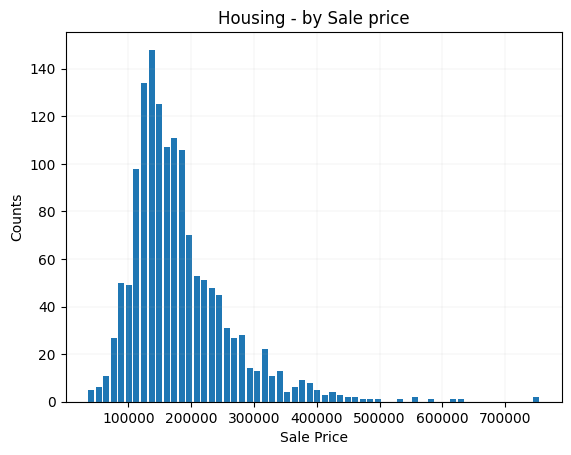

In [9]:
plt.hist(train_data['SalePrice'],bins=60,histtype='bar',rwidth=0.8)
plt.grid(linewidth=0.1)
plt.xlabel('Sale Price')
plt.ylabel('Counts')
plt.title('Housing - by Sale price')
plt.show()

In [10]:
# positive value indicates that we have a right-skewed distribution, a negative value indicates a left-skewed
# distribution and a value of 0 indicates a perfect normal distribution
# our distribution is clearly rightly skewed and outside the aceptable range of [-0.5,0.5]
print('skewness of Sale Price distribution is, ',train_data['SalePrice'].skew())

skewness of Sale Price distribution is,  1.8828757597682129


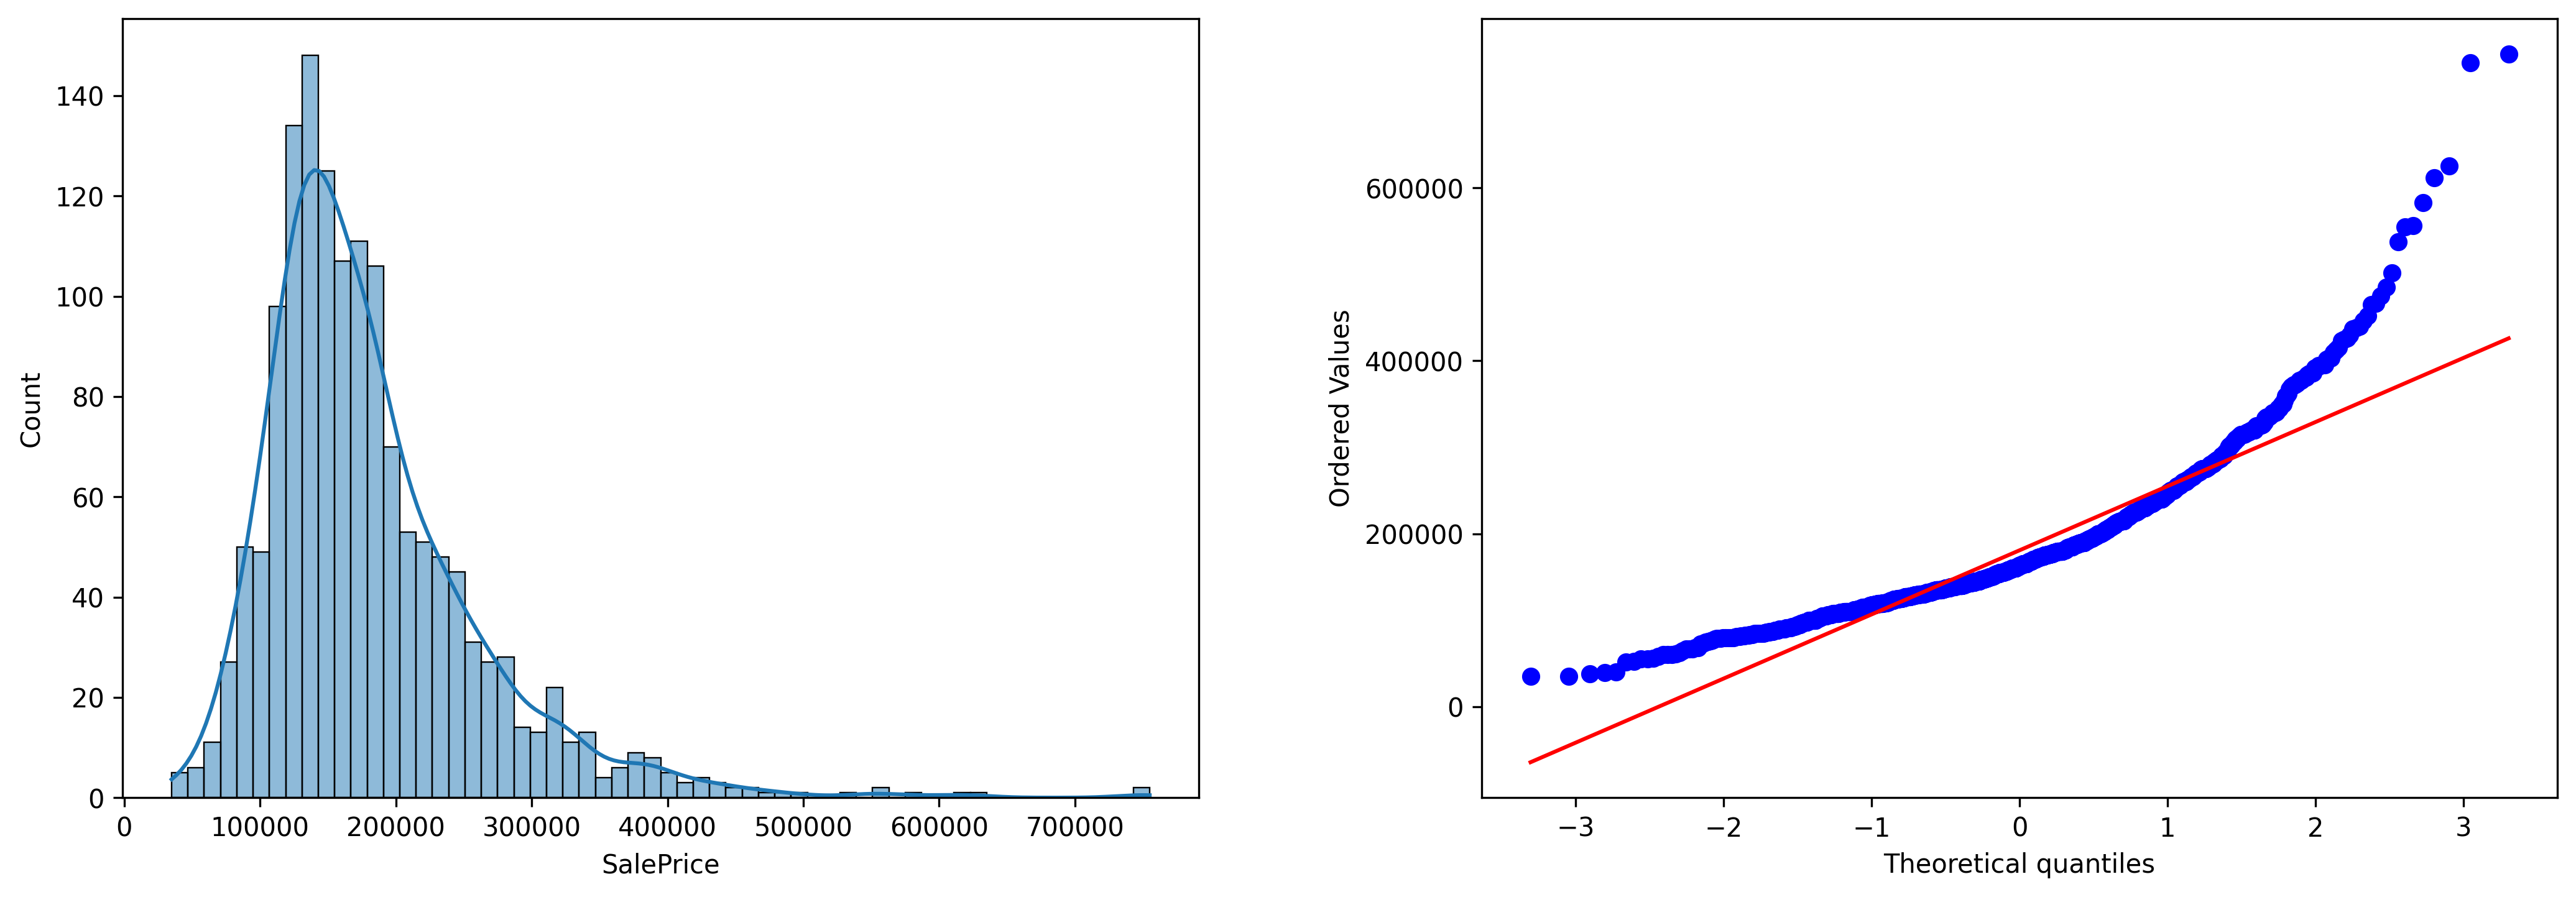

In [11]:
#sns.histplot(train_data['SalePrice'], bins=60,kde = True)
fig, axes = plt.subplots(1,2, figsize=(15,6), dpi = 300)
sns.histplot(ax=axes[0], data = train_data['SalePrice'],bins=60,kde = True)   
stats.probplot(train_data['SalePrice'], dist="norm", plot=plt) 
plt.title("")
plt.tight_layout(pad =5.0)  
plt.show()

To handle the skewness, we can use a number of mathematical transformers such as the log transform, reciprocal transform, a custom transform or a square root transform. Since our target variable is rightly skewed, we will use a Log transformer. This will be done later.

Now, let us identify features that are most correlated with out target variable

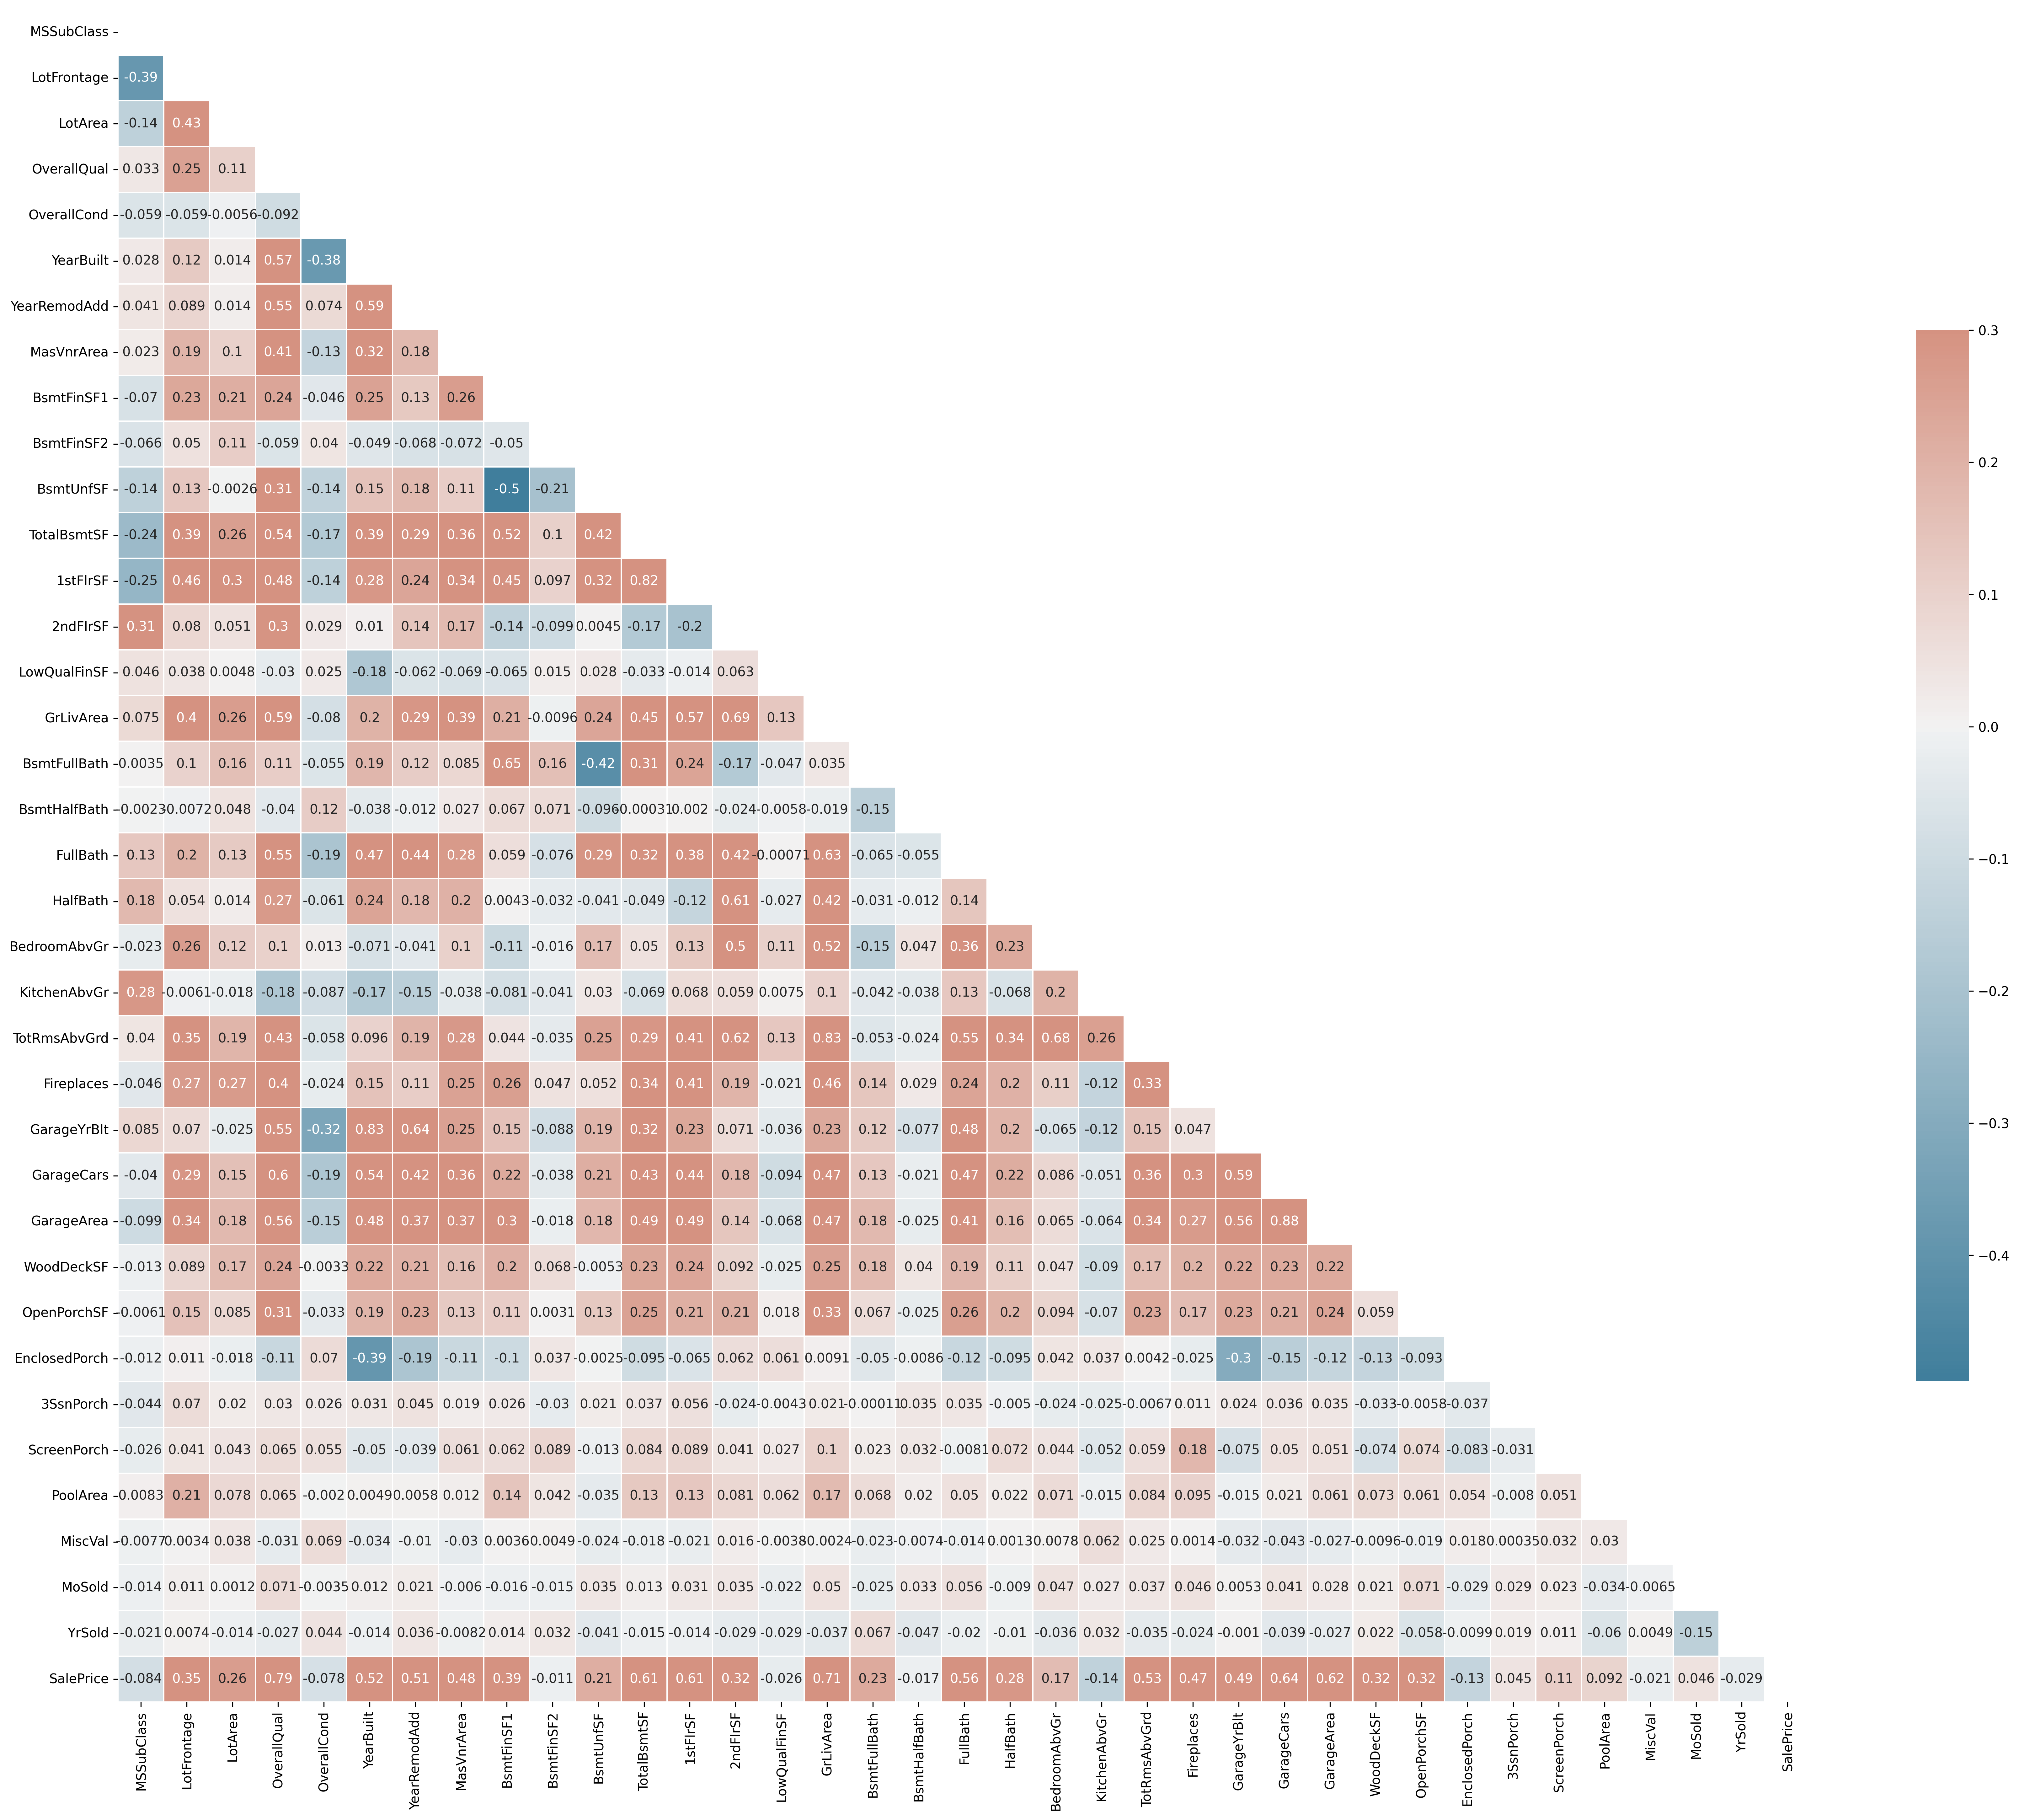

In [12]:
corr_matrix=(train_data.copy().drop('Id',axis=1)).corr(numeric_only = True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(29, 29), dpi=300)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [13]:
## Alternatively
train_data_copy = train_data.copy().drop('Id',axis=1) # mamke a copy o
((train_data_copy.select_dtypes(include=[np.number])).corr('pearson'))['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [14]:
fig, ax = plt.subplots(3,3, figsize=(30,20), dpi = 500)

ax[0,0].scatter( x = train_data_copy['OverallQual'],y = train_data['SalePrice'])
ax[0,0].set_xlabel('Overall quality', fontsize=16)
ax[0,0].set_ylabel('Sale Price',fontsize=16)
ax[0,0].xaxis.set_tick_params(labelsize = 14)
ax[0,0].yaxis.set_tick_params(labelsize = 14)
ax[0,0].set_title('pearson = 0.791',fontsize=16)


ax[0,1].scatter(x= train_data_copy['GrLivArea'], y = train_data['SalePrice'])
ax[0,1].set_xlabel('Above ground living area SF', fontsize=16)
ax[0,1].set_ylabel('Sale Price',fontsize=16)
ax[0,1].xaxis.set_tick_params(labelsize = 14)
ax[0,1].yaxis.set_tick_params(labelsize = 14)
ax[0,1].set_title('pearson = 0.709',fontsize=16)

ax[0,2].scatter(x= train_data_copy['GarageCars'], y = train_data['SalePrice'])
ax[0,2].set_xlabel('Garage cars', fontsize=16)
ax[0,2].set_ylabel('Sale Price',fontsize=16)
ax[0,2].xaxis.set_tick_params(labelsize = 14)
ax[0,2].yaxis.set_tick_params(labelsize = 14)
ax[0,2].set_title('pearson = 0.640',fontsize=16)

ax[1,0].scatter(x= train_data_copy['GarageArea'], y = train_data['SalePrice'])
ax[1,0].set_xlabel('Garage area', fontsize=16)
ax[1,0].set_ylabel('Sale Price',fontsize=16)
ax[1,0].xaxis.set_tick_params(labelsize = 14)
ax[1,0].yaxis.set_tick_params(labelsize = 14)
ax[1,0].set_title('pearson = 0.623',fontsize=16)

ax[1,1].scatter(x= train_data_copy['TotalBsmtSF'], y = train_data['SalePrice'])
ax[1,1].set_xlabel('Total SF of basemement area', fontsize=16)
ax[1,1].set_ylabel('Sale Price',fontsize=16)
ax[1,1].xaxis.set_tick_params(labelsize = 14)
ax[1,1].yaxis.set_tick_params(labelsize = 14)
ax[1,1].set_title('pearson = 0.614',fontsize=16)

ax[1,2].scatter(x= train_data_copy['1stFlrSF'], y = train_data['SalePrice'])
ax[1,2].set_xlabel('1st floor SF', fontsize=16)
ax[1,2].set_ylabel('Sale Price',fontsize=16)
ax[1,2].xaxis.set_tick_params(labelsize = 14)
ax[1,2].yaxis.set_tick_params(labelsize = 14)
ax[1,2].set_title('pearson = 0.606',fontsize=16)

ax[2,0].scatter(x= train_data_copy['FullBath'], y = train_data['SalePrice'])
ax[2,0].set_xlabel('Full bath', fontsize=16)
ax[2,0].set_ylabel('Sale Price',fontsize=16)
ax[2,0].xaxis.set_tick_params(labelsize = 14)
ax[2,0].yaxis.set_tick_params(labelsize = 14)
ax[2,0].set_title('pearson = 0.561',fontsize=16)

ax[2,1].scatter(x= train_data_copy['TotRmsAbvGrd'], y = train_data['SalePrice'])
ax[2,1].set_xlabel('Total rooms above ground', fontsize=16)
ax[2,1].set_ylabel('Sale Price',fontsize=16)
ax[2,1].xaxis.set_tick_params(labelsize = 14)
ax[2,1].yaxis.set_tick_params(labelsize = 14)
ax[2,1].set_title('pearson = 0.534',fontsize=16)

ax[2,2].scatter(x= train_data_copy['YearBuilt'], y = train_data['SalePrice'])
ax[2,2].set_xlabel('Year built', fontsize=16)
ax[2,2].set_ylabel('Sale Price',fontsize=16)
ax[2,2].xaxis.set_tick_params(labelsize = 14)
ax[2,2].yaxis.set_tick_params(labelsize = 14)
ax[2,2].set_title('pearson = 0.523',fontsize=16)

plt.tight_layout(pad =3.0)  
plt.show()

We see some extreme outliers in some of the features above. For example, in the plot of Sale Price vs above ground living area, we see two very large living areas with very low prices to the right of the plot. A similar pattern can be seen for Sale Price vs Total SF basement area; Sale Price vs 1st floor SF and Sale Price vs Total rooms above ground. Let us deal with these outliers by removing them

### Removing outliers

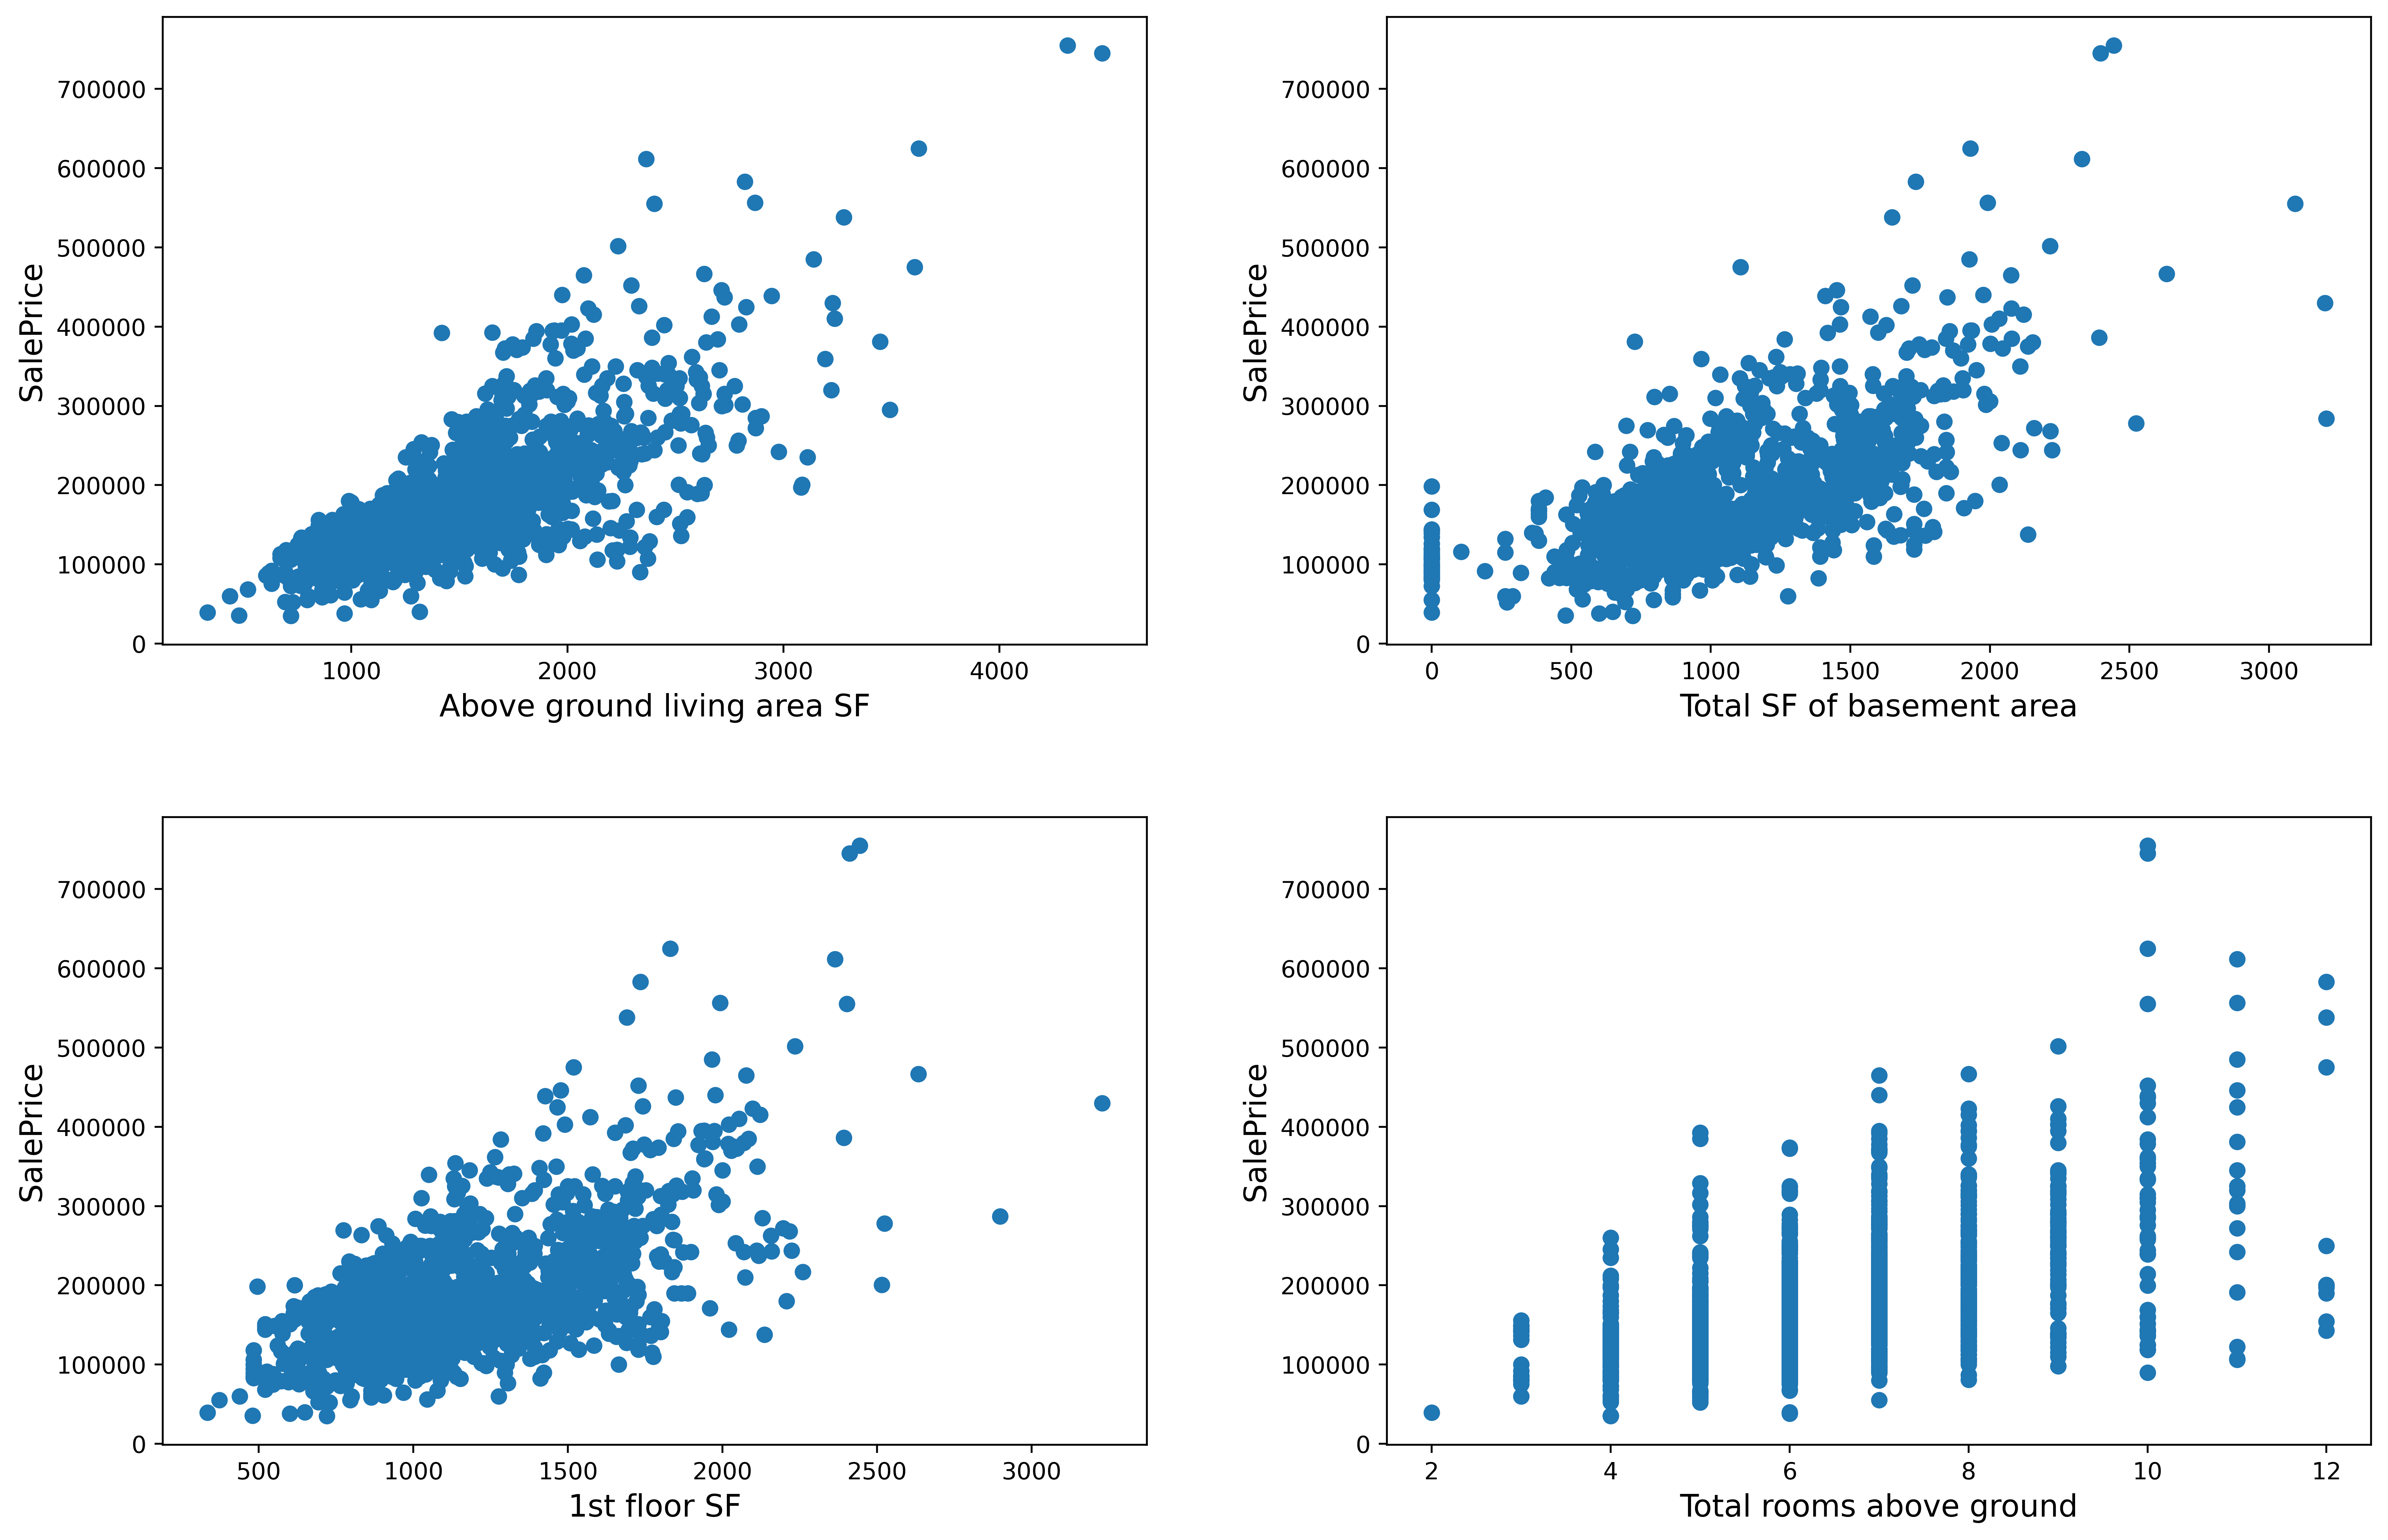

In [15]:
train_data_copy = train_data_copy.drop(train_data_copy[(train_data_copy['GrLivArea']>4500) & (train_data_copy['SalePrice']<250000)].index)
train_data_copy = train_data_copy.drop(train_data_copy[(train_data_copy['TotalBsmtSF']>5000) & (train_data_copy['SalePrice']<250000)].index)
train_data_copy = train_data_copy.drop(train_data_copy[(train_data_copy['1stFlrSF']>5000) & (train_data_copy['SalePrice']<250000)].index)
train_data_copy = train_data_copy.drop(train_data_copy[(train_data_copy['TotRmsAbvGrd']>13) & (train_data_copy['SalePrice']<250000)].index)

#Check the graphic again
fig, ax = plt.subplots(2,2, figsize=(15,10), dpi = 500)
ax[0,0].scatter(train_data_copy['GrLivArea'], train_data_copy['SalePrice'])
ax[0,0].set_ylabel('SalePrice', fontsize=13)
ax[0,0].set_xlabel('Above ground living area SF', fontsize=13)

ax[0,1].scatter(train_data_copy['TotalBsmtSF'], train_data_copy['SalePrice'])
ax[0,1].set_ylabel('SalePrice', fontsize=13)
ax[0,1].set_xlabel('Total SF of basement area', fontsize=13)

ax[1,0].scatter(train_data_copy['1stFlrSF'], train_data_copy['SalePrice'])
ax[1,0].set_ylabel('SalePrice', fontsize=13)
ax[1,0].set_xlabel('1st floor SF', fontsize=13)

ax[1,1].scatter(train_data_copy['TotRmsAbvGrd'], train_data_copy['SalePrice'])
ax[1,1].set_ylabel('SalePrice', fontsize=13)
ax[1,1].set_xlabel('Total rooms above ground', fontsize=13)
plt.tight_layout(pad =4.0) 
plt.show()


## Preprocessing

Here, we do some data cleaning by getting rid of missing values. We also do some feature scaling and transformation. But first, we will merge both the training and test set for easy handling and then split the data again.

First, we will seperate the features from the target in the training set

In [16]:
nrowstrain = train_data_copy.shape[0]        # keep track of the number of rows in the training set
nrowstest = test_data.shape[0]               # keep track of the number of rows in the test set
ytrain = train_data_copy['SalePrice']        # target feature
test_data = test_data.drop('Id',axis=1)      # drop ID from test data since we already dropped this from train data and is also not informative
new_train_data_copy = train_data_copy.drop(['SalePrice'], axis = 1) # drop the target feature from the training set

In [17]:
# combine training and test set
concat_train_and_test = pd.concat([new_train_data_copy,test_data], axis=0, sort=False)

In [18]:
# let's check the shape of the combined dataset
concat_train_and_test.shape

(2916, 79)

In [19]:
# let's have a general overview of the combined dataset
concat_train_and_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2916 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2916 non-null   int64  
 1   MSZoning       2912 non-null   object 
 2   LotFrontage    2430 non-null   float64
 3   LotArea        2916 non-null   int64  
 4   Street         2916 non-null   object 
 5   Alley          197 non-null    object 
 6   LotShape       2916 non-null   object 
 7   LandContour    2916 non-null   object 
 8   Utilities      2914 non-null   object 
 9   LotConfig      2916 non-null   object 
 10  LandSlope      2916 non-null   object 
 11  Neighborhood   2916 non-null   object 
 12  Condition1     2916 non-null   object 
 13  Condition2     2916 non-null   object 
 14  BldgType       2916 non-null   object 
 15  HouseStyle     2916 non-null   object 
 16  OverallQual    2916 non-null   int64  
 17  OverallCond    2916 non-null   int64  
 18  YearBuilt    

We see from the above that our dataset consists of 2916 rows and 79 columns (features) of which 36 are categorical and 43 are numerical. We also see that several features have missing values. Let us further visualize the extent to which we have a lot of missing values in our dataset. Let us visualize this

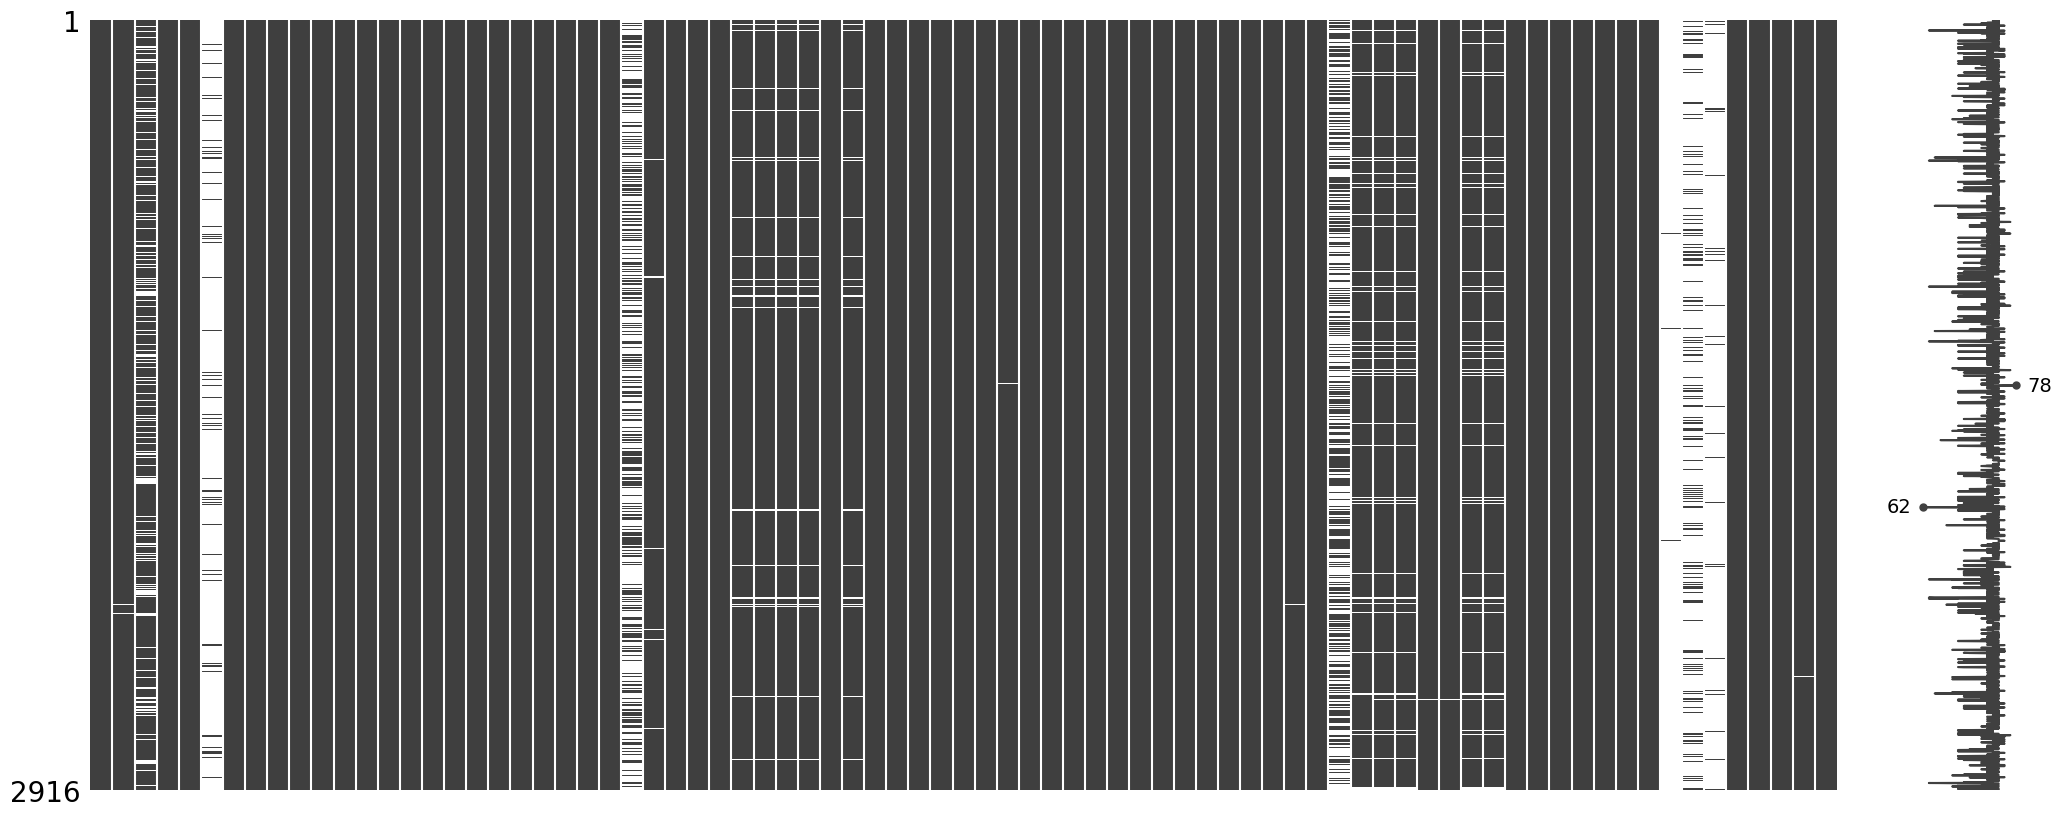

In [20]:
# visializing data to easily see how much missing data we have
msno.matrix(concat_train_and_test)
plt.show()

In [21]:
# calculate the percentage of missing values for features that have missing values
percent_missing = concat_train_and_test.isnull().sum() * 100 / len(concat_train_and_test)
percent_missing = percent_missing.drop(percent_missing[percent_missing==0].index).sort_values(ascending = False)
missing_value = pd.DataFrame({'percent_missing': percent_missing})
missing_value

percent_missing
PoolQC              99.691358
MiscFeature         96.399177
Alley               93.244170
Fence               80.418381
MasVnrType          60.528121
FireplaceQu         48.662551
LotFrontage         16.666667
GarageFinish         5.418381
GarageQual           5.418381
GarageCond           5.418381
GarageYrBlt          5.418381
GarageType           5.349794
BsmtExposure         2.812071
BsmtCond             2.812071
BsmtQual             2.777778
BsmtFinType2         2.743484
BsmtFinType1         2.709191
MasVnrArea           0.788752
MSZoning             0.137174
BsmtFullBath         0.068587
BsmtHalfBath         0.068587
Functional           0.068587
Utilities            0.068587
GarageArea           0.034294
GarageCars           0.034294
Electrical           0.034294
KitchenQual          0.034294
TotalBsmtSF          0.034294
BsmtUnfSF            0.034294
BsmtFinSF2           0.034294
BsmtFinSF1           0.034294
Exterior2nd          0.034294
Exterior1st          0.034294
SaleType             0.034294

### Filling missing values

We notice from the data_description file provided that some of the categorical features we identified to have missing values in our dataset are actually not missing values but it's mostly the case that the said houses do not have such attributes for example for the attribiute 'BsmtQual' (i.e., the quality of the basement), an NAN value actually corresponds to having no basement. Since we have a small dataset, for these cases, rather than deleting the corresponding row, we will manually replace the NAN values with a new category that tells us that that attribute is absent. Allso, for certain other variables, the documentation already specified what should be assumed e.g., for the feature 'Functional', we are to assume typical i.e. 'Typ' unless deductions are warranted.

Also for categorical features like, 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Electrical' and 'SaleType' that have only one missing entry, we replace these with the most frequently occuring category. Similarly, for the categorical feature 'MSZoning', since the 'RL' occurs far more than other category, we replace missing entries for this feature with 'RL'. We see this same pattern with the categorical feature 'Utilities', all but three of the entries have all public utilities ('Allpub'). Of these three one has 'NoSeWa', and the remaining two are unknown. We replace these unknowns with 'Allpub'. 

Now let us take care of missing numerical features. For features like 'GarageCars' and 'GarageArea', we filling the missing values with 0, since garages are absent in this case and hece this means 0 garage cars and 0 garage area. Also for 'MasVntArea', the nan value represents cases where Masonry veneer type is absent, hence we expect 0 area for these cases and therefore replace the missing values with 0. Similarly, for 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath' and 'TotalBsmtSF', since the nan values indicate cases where there are no basement, we can replace these missing values with 0 since no basement implies no basement type 1 finished square feet, etc. 

Now, let us deal with the feature 'LotFrontage', according to the documentation, this is the linear feet of street connected to the property. Since the width of a lot is most likely similar across neighbourhoods, we will fill in missing values of 'LotFrontage' with the median LotFrontage for the neighborhoods.

In [22]:
# define a function to impute NaN value with a specified category
def impute_NaN_create_category(DataFrame,columnName,catName):
     DataFrame[columnName] = np.where(DataFrame[columnName].isnull(),catName,DataFrame[columnName])

In [23]:
# Call function to create new category for variables

# columns to replace NaN with new categoty
columns = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond', 'PoolQC', 'MiscFeature','Alley','Fence','MasVnrType','FireplaceQu','Functional']
# new category names
catName = ['No Basement','No Basement','No Basement','No Basement','No Basement','No Garage','No Garage','No Garage','No Garage', 'No Garage','No pool', 'None','None','None','None','None','Typ']

# replace NaN values in specified column with specified category
for column, category in zip(columns,catName):
    impute_NaN_create_category(concat_train_and_test,column,category)   
    
#2. Display result
concat_train_and_test[columns].head(3)

BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 GarageType  \
0       Gd       TA           No          GLQ          Unf     Attchd   
1       Gd       TA           Gd          ALQ          Unf     Attchd   
2       Gd       TA           Mn          GLQ          Unf     Attchd   

  GarageYrBlt GarageFinish GarageQual GarageCond   PoolQC MiscFeature Alley  \
0      2003.0          RFn         TA         TA  No pool        None  None   
1      1976.0          RFn         TA         TA  No pool        None  None   
2      2001.0          RFn         TA         TA  No pool        None  None   

  Fence MasVnrType FireplaceQu Functional  
0  None    BrkFace        None        Typ  
1  None       None          TA        Typ  
2  None    BrkFace          TA        Typ

In [24]:
##  fill categorical features with only one missing entry with most frequently occuring category

In [25]:
for i in ['Exterior1st', 'Exterior2nd', 'KitchenQual', 'Electrical', 'SaleType','MSZoning','Utilities']:
    concat_train_and_test[i] = concat_train_and_test[i].fillna(concat_train_and_test[i].mode()[0])

Now, let us deal with missing numerical values as earlier indicated

In [26]:
for i in ['GarageCars','GarageArea','MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath','TotalBsmtSF']:
    concat_train_and_test[i] = concat_train_and_test[i].fillna(0)

In [27]:
# fill missing values in 'LotFrontage' by the median 'LotFrontage' of neighborhoods as explained earlier
concat_train_and_test.LotFrontage = concat_train_and_test.groupby('Neighborhood')['LotFrontage'].transform(lambda y: y.fillna(y.median()))

In [28]:
# check if there are still missing entries in the combined dataset
print('we have', concat_train_and_test.isnull().sum().sum(), 'missing values in the combined dataset')

we have 0 missing values in the combined dataset


## Feature engineering

Here, we do a bit of feature engineering by creating new (important) features where necessary. We also observe that some categorical features in our dataset are given numerical values, we will chnage these to non-numerical vatiables by converting them to string. Some of these features are: 'MSSubClass', 'YrSold', 'MoSold'. The other features i.e., 'OverallCond' and 'OverallQual' that fall into this category can be combined to form another feature since together, they give a better insight into the state of the house. We call this feature, 'TrueQuality'. Also, since homw buyers are usually always particular about the average square footage of houses when buying, it makes sense to combine the features; '1stFleSF', '2ndflrSF' and 'TotalBsmtSF' as a measure of the size of the house. We call this combined feature. 'TotalHouseSF'.

In [29]:
# Combine 'OverallCond' and 'OverallQual' as one feature
concat_train_and_test['TrueQuality'] = concat_train_and_test['OverallCond']+concat_train_and_test['OverallQual']
# Convert categorical features with numerical values to non-numerical
for i in ['MSSubClass', 'YrSold', 'MoSold', 'TrueQuality']:
    concat_train_and_test[i] = concat_train_and_test[i].astype(str)

In [30]:
# combine the features; '1stFlrSF', 2ndFlrSF', 'TotalBsmtSF' into an new feature, 'TotalHouseSF', that gives a sense of the total square feet of the house to be bought 
concat_train_and_test['TotalHouseSF'] = concat_train_and_test['1stFlrSF'] + concat_train_and_test['2ndFlrSF']+concat_train_and_test['TotalBsmtSF']

Now, let us Convert all categorical variable into dummy/indicator variables. this helps prevent our ML algorithms from  for example mis-classifying or mis-assuming the similarity of two nearby or distant variables.

In [31]:
# convert categorical variables into dummy variables
concat_train_and_test_dummy = pd.get_dummies(concat_train_and_test)

In [32]:
## Next, we check for skewness in our numerical features and correct skewed features using log transformation

In [33]:
# obtain all numerical features
All_numeric_features = concat_train_and_test_dummy.dtypes[concat_train_and_test_dummy.dtypes != "object"].index

# Check the skew of obtained numerical features
All_skewed_features = concat_train_and_test_dummy[All_numeric_features].apply(lambda y: skew(y.dropna())).sort_values(ascending=False)

# As explained in the beginning, features are  skewed if they fall outside the range [-0.5,0.5]. In other words
# if the absolute value of their skew is greater than 0.5
skewness = All_skewed_features[abs(All_skewed_features) > 0.5]
# get the index of the skewed features
index_skewness = skewness.index  

# Now we normalize the skewed features using log_transformation
    
for i in index_skewness:
    concat_train_and_test_dummy[i] = np.log1p(concat_train_and_test_dummy[i])

Next, we log transform the target variable ytrain and visualized it

In [34]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

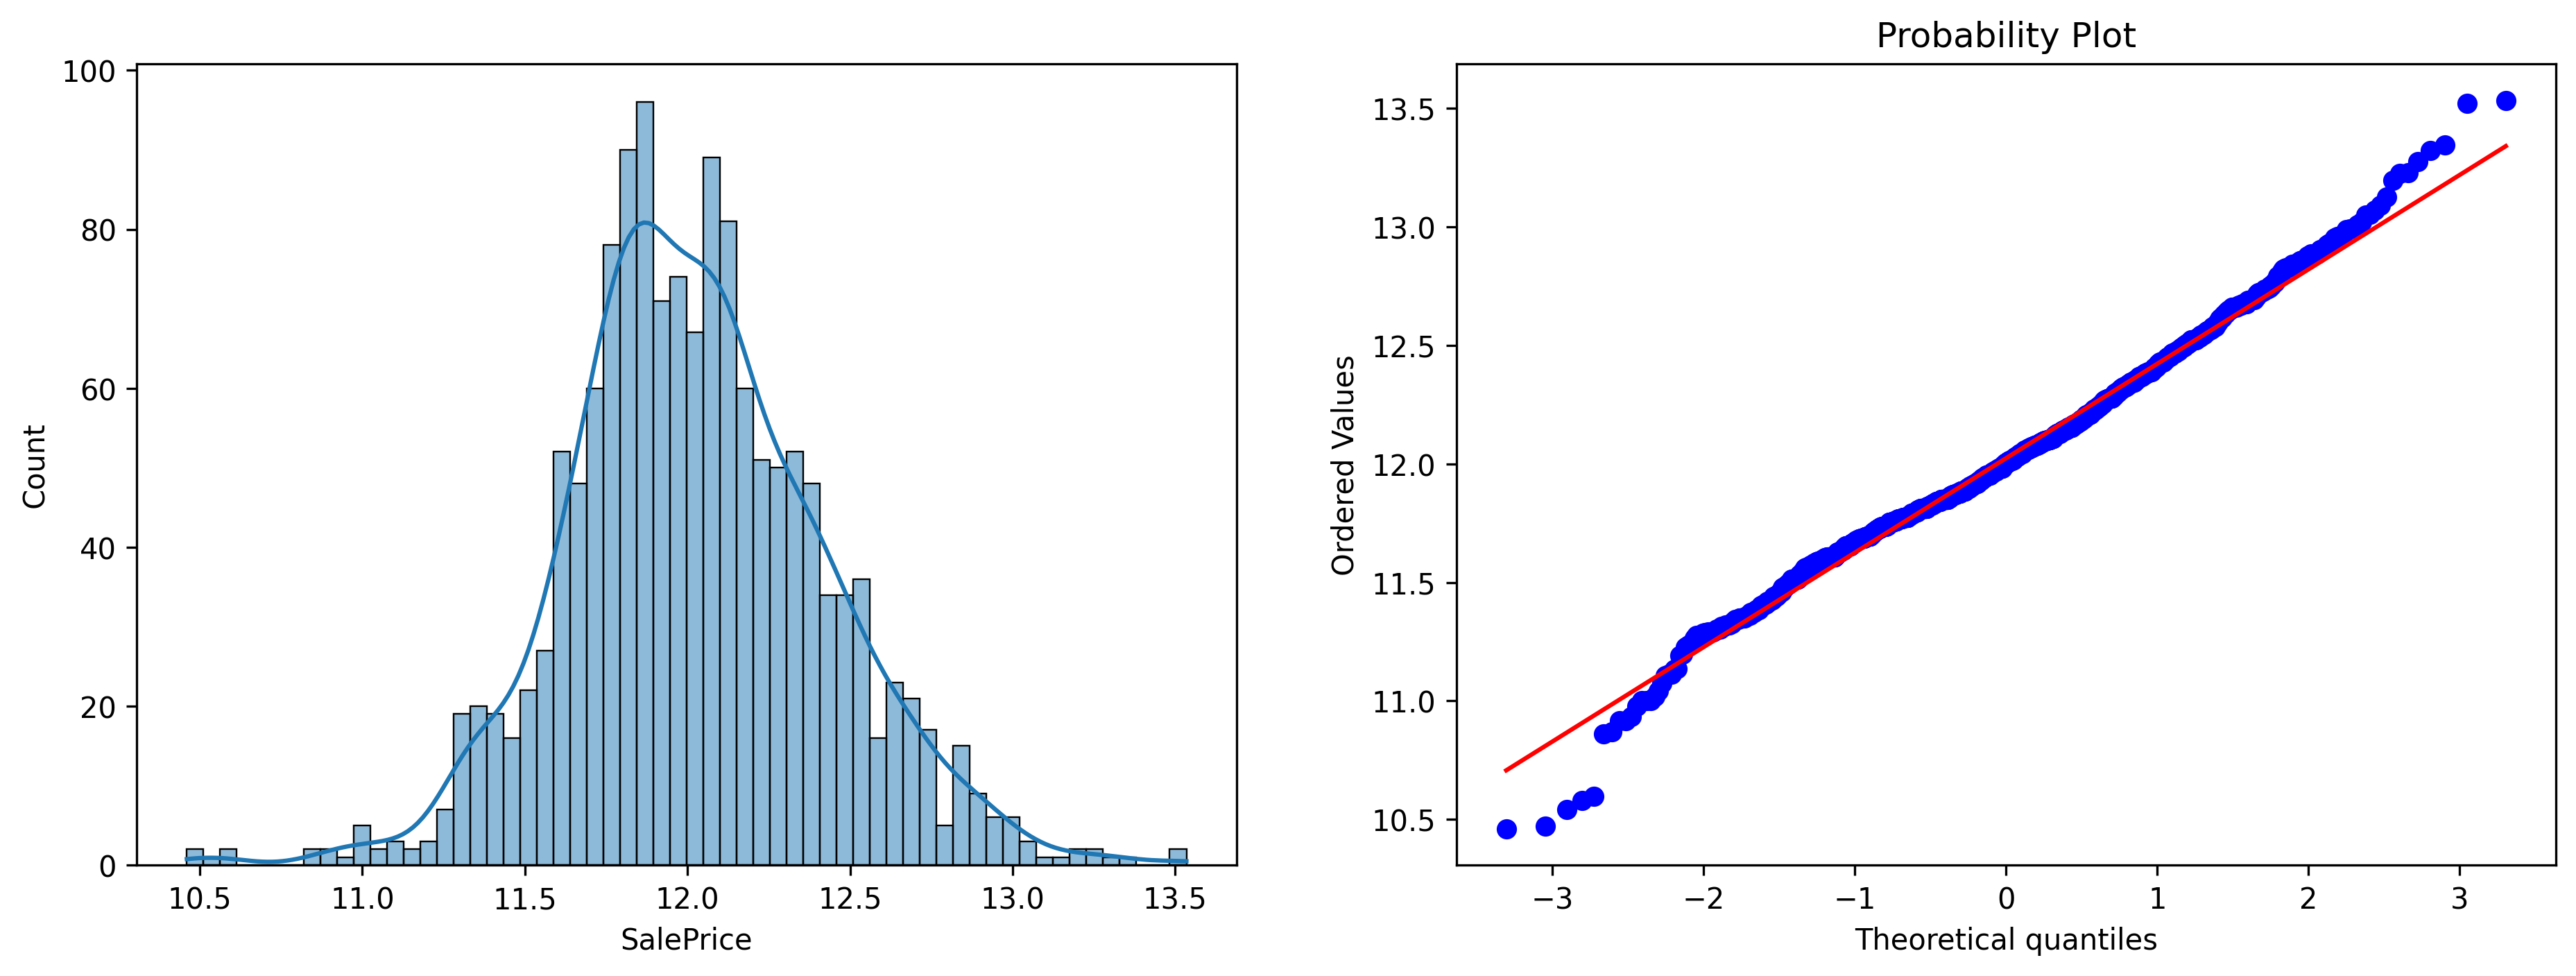

Skewness is 0.12 after Log transformation.


In [35]:
fig, axes = plt.subplots(1,2, figsize=(15,5), dpi = 300)
#logTrans = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), ['SalePrice'])])

#ytrain_log = pd.DataFrame(logTrans.fit_transform(train_data))
ytrain_log = np.log1p(ytrain)
plt.title("New distribution after Transformation", fontsize=10)
sns.histplot(ax=axes[0],data=ytrain_log,bins=60, kde=True , legend=False)
plt.xlabel('Sale Price',fontsize=10)
plt.ylabel('Count',fontsize=10)
stats.probplot(ytrain_log.squeeze(), dist="norm", plot=plt)
plt.show()

print(f"Skewness is {round(ytrain_log.skew(),2)} after Log transformation.")

## Model selection and training

We will use a number of machine learning models but first, let us separate the combined dataset back into training and test set

In [36]:
Trainset = concat_train_and_test_dummy[:nrowstrain]
target = ytrain_log
Testset = concat_train_and_test_dummy[nrowstrain:]

We will evaluate our model performance using root mean square error (RMSE) as defined below.

In [37]:
def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, Trainset, target, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

We will use Scikit-learn k-fold cross-validation with 10 folds

In [38]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

In [39]:
All_cv_scores = []
All_cv_std = []

## linear regression
linreg = LinearRegression()
score_linereg = cv_rmse(linreg)
All_cv_scores.append(score_linereg.mean())
All_cv_std.append(score_linereg.std())


## Lasso regression
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1)) # we use RobustScaler to make the model robust to outliers
score_lasso = cv_rmse(lasso)
All_cv_scores.append(score_lasso.mean())
All_cv_std.append(score_lasso.std())


## Elastic net regressor
ElasticNet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score_Enet = cv_rmse(ElasticNet)
All_cv_scores.append(score_Enet.mean())
All_cv_std.append(score_Enet.std())


## Kernel ridge regressor
KridgeR = KernelRidge()
score_Kridge = cv_rmse(KridgeR)
All_cv_scores.append(score_Kridge.mean())
All_cv_std.append(score_Kridge.std())


## Gradient boost regressor
GBoost = GradientBoostingRegressor()
score_GB = cv_rmse(GBoost)
All_cv_scores.append(score_GB.mean())
All_cv_std.append(score_GB.std())


## xgboost regressor
xgb = xgb.XGBRegressor()
score_xgb = cv_rmse(xgb)
All_cv_scores.append(score_xgb.mean())
All_cv_std.append(score_xgb.std())


# Cat Boost Regressor
catboost = CatBoostRegressor()
score_catboost = cv_rmse(catboost)
All_cv_scores.append(score_catboost.mean())
All_cv_std.append(score_catboost.std())

## finally, we will form a linear combination of the different predictors to give an improved prediction accuracy (i.e.,
## using stacked regression)

stackedReg = StackingCVRegressor(regressors=(LinearRegression(),
                                           make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1)),
                                           make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)),
                                           KernelRidge(),GradientBoostingRegressor(),CatBoostRegressor()),
                                           meta_regressor = CatBoostRegressor(),use_features_in_secondary = True)

score_stackedReg = cv_rmse(stackedReg)
All_cv_scores.append(score_stackedReg.mean())
All_cv_std.append(score_stackedReg.std())

Learning rate set to 0.042733
0:	learn: 0.3866413	total: 58.5ms	remaining: 58.5s
1:	learn: 0.3765464	total: 60.6ms	remaining: 30.3s
2:	learn: 0.3661211	total: 62.6ms	remaining: 20.8s
3:	learn: 0.3563184	total: 64.4ms	remaining: 16s
4:	learn: 0.3466071	total: 66.3ms	remaining: 13.2s
5:	learn: 0.3371700	total: 68ms	remaining: 11.3s
6:	learn: 0.3288505	total: 69.8ms	remaining: 9.91s
7:	learn: 0.3202522	total: 71.7ms	remaining: 8.89s
8:	learn: 0.3123760	total: 73.7ms	remaining: 8.11s
9:	learn: 0.3047141	total: 75.5ms	remaining: 7.47s
10:	learn: 0.2969484	total: 77.4ms	remaining: 6.96s
11:	learn: 0.2896201	total: 79.2ms	remaining: 6.52s
12:	learn: 0.2827262	total: 81.1ms	remaining: 6.16s
13:	learn: 0.2763863	total: 83.5ms	remaining: 5.88s
14:	learn: 0.2698233	total: 85.4ms	remaining: 5.61s
15:	learn: 0.2645499	total: 87.2ms	remaining: 5.36s
16:	learn: 0.2582558	total: 89.1ms	remaining: 5.15s
17:	learn: 0.2527823	total: 90.9ms	remaining: 4.96s
18:	learn: 0.2472295	total: 92.9ms	remaining: 4.

175:	learn: 0.0940112	total: 396ms	remaining: 1.85s
176:	learn: 0.0937998	total: 398ms	remaining: 1.85s
177:	learn: 0.0936318	total: 400ms	remaining: 1.85s
178:	learn: 0.0934716	total: 402ms	remaining: 1.84s
179:	learn: 0.0932747	total: 404ms	remaining: 1.84s
180:	learn: 0.0929895	total: 406ms	remaining: 1.84s
181:	learn: 0.0927709	total: 408ms	remaining: 1.83s
182:	learn: 0.0925592	total: 411ms	remaining: 1.83s
183:	learn: 0.0923540	total: 413ms	remaining: 1.83s
184:	learn: 0.0922333	total: 415ms	remaining: 1.83s
185:	learn: 0.0920723	total: 417ms	remaining: 1.82s
186:	learn: 0.0919005	total: 419ms	remaining: 1.82s
187:	learn: 0.0917827	total: 421ms	remaining: 1.82s
188:	learn: 0.0916919	total: 423ms	remaining: 1.81s
189:	learn: 0.0915212	total: 424ms	remaining: 1.81s
190:	learn: 0.0913162	total: 426ms	remaining: 1.81s
191:	learn: 0.0911209	total: 429ms	remaining: 1.81s
192:	learn: 0.0910009	total: 431ms	remaining: 1.8s
193:	learn: 0.0907580	total: 433ms	remaining: 1.8s
194:	learn: 0.

380:	learn: 0.0711141	total: 794ms	remaining: 1.29s
381:	learn: 0.0710868	total: 796ms	remaining: 1.29s
382:	learn: 0.0710138	total: 798ms	remaining: 1.28s
383:	learn: 0.0709311	total: 799ms	remaining: 1.28s
384:	learn: 0.0708833	total: 801ms	remaining: 1.28s
385:	learn: 0.0707874	total: 803ms	remaining: 1.28s
386:	learn: 0.0707313	total: 805ms	remaining: 1.27s
387:	learn: 0.0705953	total: 807ms	remaining: 1.27s
388:	learn: 0.0705703	total: 809ms	remaining: 1.27s
389:	learn: 0.0704855	total: 811ms	remaining: 1.27s
390:	learn: 0.0702936	total: 813ms	remaining: 1.26s
391:	learn: 0.0702849	total: 815ms	remaining: 1.26s
392:	learn: 0.0702024	total: 817ms	remaining: 1.26s
393:	learn: 0.0701750	total: 820ms	remaining: 1.26s
394:	learn: 0.0700410	total: 822ms	remaining: 1.26s
395:	learn: 0.0698947	total: 824ms	remaining: 1.26s
396:	learn: 0.0698277	total: 826ms	remaining: 1.25s
397:	learn: 0.0697371	total: 828ms	remaining: 1.25s
398:	learn: 0.0696203	total: 830ms	remaining: 1.25s
399:	learn: 

587:	learn: 0.0565313	total: 1.19s	remaining: 835ms
588:	learn: 0.0564597	total: 1.19s	remaining: 833ms
589:	learn: 0.0564371	total: 1.2s	remaining: 831ms
590:	learn: 0.0563403	total: 1.2s	remaining: 829ms
591:	learn: 0.0563200	total: 1.2s	remaining: 826ms
592:	learn: 0.0562597	total: 1.2s	remaining: 825ms
593:	learn: 0.0561932	total: 1.2s	remaining: 823ms
594:	learn: 0.0561354	total: 1.21s	remaining: 821ms
595:	learn: 0.0561066	total: 1.21s	remaining: 819ms
596:	learn: 0.0560316	total: 1.21s	remaining: 816ms
597:	learn: 0.0559701	total: 1.21s	remaining: 814ms
598:	learn: 0.0559126	total: 1.21s	remaining: 812ms
599:	learn: 0.0558674	total: 1.22s	remaining: 810ms
600:	learn: 0.0557914	total: 1.22s	remaining: 808ms
601:	learn: 0.0556902	total: 1.22s	remaining: 806ms
602:	learn: 0.0556346	total: 1.22s	remaining: 804ms
603:	learn: 0.0555580	total: 1.22s	remaining: 802ms
604:	learn: 0.0555094	total: 1.23s	remaining: 800ms
605:	learn: 0.0554140	total: 1.23s	remaining: 798ms
606:	learn: 0.055

794:	learn: 0.0468470	total: 1.59s	remaining: 410ms
795:	learn: 0.0468178	total: 1.59s	remaining: 408ms
796:	learn: 0.0467748	total: 1.59s	remaining: 406ms
797:	learn: 0.0467288	total: 1.59s	remaining: 404ms
798:	learn: 0.0466826	total: 1.6s	remaining: 402ms
799:	learn: 0.0466106	total: 1.6s	remaining: 400ms
800:	learn: 0.0465440	total: 1.6s	remaining: 398ms
801:	learn: 0.0464870	total: 1.6s	remaining: 396ms
802:	learn: 0.0464301	total: 1.61s	remaining: 394ms
803:	learn: 0.0463995	total: 1.61s	remaining: 392ms
804:	learn: 0.0463372	total: 1.61s	remaining: 390ms
805:	learn: 0.0462756	total: 1.61s	remaining: 388ms
806:	learn: 0.0462709	total: 1.61s	remaining: 386ms
807:	learn: 0.0462328	total: 1.62s	remaining: 384ms
808:	learn: 0.0461689	total: 1.62s	remaining: 382ms
809:	learn: 0.0461200	total: 1.62s	remaining: 380ms
810:	learn: 0.0460982	total: 1.62s	remaining: 378ms
811:	learn: 0.0460685	total: 1.62s	remaining: 376ms
812:	learn: 0.0460205	total: 1.63s	remaining: 374ms
813:	learn: 0.04

999:	learn: 0.0385262	total: 1.99s	remaining: 0us
Learning rate set to 0.042733
0:	learn: 0.3852533	total: 2.14ms	remaining: 2.13s
1:	learn: 0.3749851	total: 3.75ms	remaining: 1.87s
2:	learn: 0.3637843	total: 5.51ms	remaining: 1.83s
3:	learn: 0.3537407	total: 7.44ms	remaining: 1.85s
4:	learn: 0.3446478	total: 9.41ms	remaining: 1.87s
5:	learn: 0.3356898	total: 11.3ms	remaining: 1.88s
6:	learn: 0.3266135	total: 13.2ms	remaining: 1.88s
7:	learn: 0.3185793	total: 15.3ms	remaining: 1.9s
8:	learn: 0.3105518	total: 17.1ms	remaining: 1.88s
9:	learn: 0.3034440	total: 18.9ms	remaining: 1.87s
10:	learn: 0.2966342	total: 20.7ms	remaining: 1.86s
11:	learn: 0.2888858	total: 22.5ms	remaining: 1.85s
12:	learn: 0.2828666	total: 24.4ms	remaining: 1.85s
13:	learn: 0.2758088	total: 26.2ms	remaining: 1.84s
14:	learn: 0.2692215	total: 28.1ms	remaining: 1.84s
15:	learn: 0.2629862	total: 30.5ms	remaining: 1.87s
16:	learn: 0.2575990	total: 32.3ms	remaining: 1.87s
17:	learn: 0.2518032	total: 34.3ms	remaining: 1

207:	learn: 0.0872055	total: 395ms	remaining: 1.5s
208:	learn: 0.0870255	total: 397ms	remaining: 1.5s
209:	learn: 0.0869096	total: 398ms	remaining: 1.5s
210:	learn: 0.0867418	total: 400ms	remaining: 1.5s
211:	learn: 0.0865627	total: 402ms	remaining: 1.5s
212:	learn: 0.0864865	total: 404ms	remaining: 1.49s
213:	learn: 0.0863346	total: 406ms	remaining: 1.49s
214:	learn: 0.0862347	total: 409ms	remaining: 1.49s
215:	learn: 0.0860487	total: 410ms	remaining: 1.49s
216:	learn: 0.0859866	total: 412ms	remaining: 1.49s
217:	learn: 0.0858055	total: 414ms	remaining: 1.49s
218:	learn: 0.0856397	total: 416ms	remaining: 1.48s
219:	learn: 0.0854980	total: 418ms	remaining: 1.48s
220:	learn: 0.0853893	total: 419ms	remaining: 1.48s
221:	learn: 0.0852710	total: 421ms	remaining: 1.48s
222:	learn: 0.0850941	total: 423ms	remaining: 1.47s
223:	learn: 0.0849775	total: 425ms	remaining: 1.47s
224:	learn: 0.0847901	total: 427ms	remaining: 1.47s
225:	learn: 0.0846143	total: 429ms	remaining: 1.47s
226:	learn: 0.084

416:	learn: 0.0645912	total: 793ms	remaining: 1.11s
417:	learn: 0.0645751	total: 795ms	remaining: 1.11s
418:	learn: 0.0645282	total: 797ms	remaining: 1.1s
419:	learn: 0.0644756	total: 799ms	remaining: 1.1s
420:	learn: 0.0644540	total: 801ms	remaining: 1.1s
421:	learn: 0.0643409	total: 803ms	remaining: 1.1s
422:	learn: 0.0643192	total: 805ms	remaining: 1.1s
423:	learn: 0.0642785	total: 807ms	remaining: 1.1s
424:	learn: 0.0642320	total: 809ms	remaining: 1.09s
425:	learn: 0.0641158	total: 811ms	remaining: 1.09s
426:	learn: 0.0640386	total: 813ms	remaining: 1.09s
427:	learn: 0.0639259	total: 815ms	remaining: 1.09s
428:	learn: 0.0638364	total: 817ms	remaining: 1.09s
429:	learn: 0.0637719	total: 818ms	remaining: 1.08s
430:	learn: 0.0636912	total: 820ms	remaining: 1.08s
431:	learn: 0.0635868	total: 822ms	remaining: 1.08s
432:	learn: 0.0634940	total: 824ms	remaining: 1.08s
433:	learn: 0.0634202	total: 826ms	remaining: 1.08s
434:	learn: 0.0633388	total: 828ms	remaining: 1.07s
435:	learn: 0.0632

626:	learn: 0.0510883	total: 1.19s	remaining: 708ms
627:	learn: 0.0510436	total: 1.19s	remaining: 706ms
628:	learn: 0.0509813	total: 1.19s	remaining: 704ms
629:	learn: 0.0508844	total: 1.2s	remaining: 702ms
630:	learn: 0.0508370	total: 1.2s	remaining: 701ms
631:	learn: 0.0507831	total: 1.2s	remaining: 699ms
632:	learn: 0.0507100	total: 1.2s	remaining: 697ms
633:	learn: 0.0507013	total: 1.2s	remaining: 695ms
634:	learn: 0.0506360	total: 1.21s	remaining: 693ms
635:	learn: 0.0506033	total: 1.21s	remaining: 691ms
636:	learn: 0.0505362	total: 1.21s	remaining: 689ms
637:	learn: 0.0504737	total: 1.21s	remaining: 687ms
638:	learn: 0.0504655	total: 1.21s	remaining: 685ms
639:	learn: 0.0503926	total: 1.21s	remaining: 683ms
640:	learn: 0.0503839	total: 1.22s	remaining: 681ms
641:	learn: 0.0503016	total: 1.22s	remaining: 679ms
642:	learn: 0.0502819	total: 1.22s	remaining: 678ms
643:	learn: 0.0502120	total: 1.22s	remaining: 676ms
644:	learn: 0.0501318	total: 1.22s	remaining: 674ms
645:	learn: 0.050

836:	learn: 0.0419116	total: 1.59s	remaining: 309ms
837:	learn: 0.0418916	total: 1.59s	remaining: 307ms
838:	learn: 0.0418874	total: 1.59s	remaining: 306ms
839:	learn: 0.0418112	total: 1.59s	remaining: 304ms
840:	learn: 0.0417972	total: 1.59s	remaining: 302ms
841:	learn: 0.0417522	total: 1.6s	remaining: 300ms
842:	learn: 0.0416860	total: 1.6s	remaining: 298ms
843:	learn: 0.0416526	total: 1.6s	remaining: 296ms
844:	learn: 0.0416130	total: 1.6s	remaining: 294ms
845:	learn: 0.0416067	total: 1.6s	remaining: 292ms
846:	learn: 0.0416023	total: 1.61s	remaining: 290ms
847:	learn: 0.0415695	total: 1.61s	remaining: 288ms
848:	learn: 0.0415561	total: 1.61s	remaining: 287ms
849:	learn: 0.0415033	total: 1.61s	remaining: 285ms
850:	learn: 0.0414716	total: 1.61s	remaining: 283ms
851:	learn: 0.0414147	total: 1.62s	remaining: 281ms
852:	learn: 0.0413622	total: 1.62s	remaining: 279ms
853:	learn: 0.0413217	total: 1.62s	remaining: 277ms
854:	learn: 0.0412859	total: 1.62s	remaining: 275ms
855:	learn: 0.041

Learning rate set to 0.042733
0:	learn: 0.3949375	total: 2.63ms	remaining: 2.63s
1:	learn: 0.3842856	total: 5.09ms	remaining: 2.54s
2:	learn: 0.3735581	total: 7.02ms	remaining: 2.33s
3:	learn: 0.3643389	total: 9.3ms	remaining: 2.32s
4:	learn: 0.3540745	total: 11.2ms	remaining: 2.22s
5:	learn: 0.3449097	total: 12.9ms	remaining: 2.14s
6:	learn: 0.3359220	total: 14.8ms	remaining: 2.1s
7:	learn: 0.3273627	total: 17.1ms	remaining: 2.13s
8:	learn: 0.3194596	total: 18.9ms	remaining: 2.08s
9:	learn: 0.3112399	total: 20.6ms	remaining: 2.04s
10:	learn: 0.3034780	total: 22.5ms	remaining: 2.02s
11:	learn: 0.2967618	total: 24.3ms	remaining: 2s
12:	learn: 0.2902588	total: 26.4ms	remaining: 2s
13:	learn: 0.2833063	total: 28.2ms	remaining: 1.99s
14:	learn: 0.2770957	total: 30.2ms	remaining: 1.98s
15:	learn: 0.2709012	total: 32.1ms	remaining: 1.97s
16:	learn: 0.2651497	total: 34.7ms	remaining: 2.01s
17:	learn: 0.2590996	total: 36.6ms	remaining: 2s
18:	learn: 0.2534373	total: 38.5ms	remaining: 1.99s
19:

203:	learn: 0.0911644	total: 395ms	remaining: 1.54s
204:	learn: 0.0909933	total: 397ms	remaining: 1.54s
205:	learn: 0.0908069	total: 399ms	remaining: 1.54s
206:	learn: 0.0906334	total: 401ms	remaining: 1.54s
207:	learn: 0.0904994	total: 403ms	remaining: 1.53s
208:	learn: 0.0903160	total: 405ms	remaining: 1.53s
209:	learn: 0.0901112	total: 407ms	remaining: 1.53s
210:	learn: 0.0899733	total: 409ms	remaining: 1.53s
211:	learn: 0.0898106	total: 411ms	remaining: 1.53s
212:	learn: 0.0896687	total: 413ms	remaining: 1.52s
213:	learn: 0.0895251	total: 415ms	remaining: 1.52s
214:	learn: 0.0894368	total: 417ms	remaining: 1.52s
215:	learn: 0.0892111	total: 418ms	remaining: 1.52s
216:	learn: 0.0891216	total: 420ms	remaining: 1.51s
217:	learn: 0.0889470	total: 422ms	remaining: 1.51s
218:	learn: 0.0888676	total: 424ms	remaining: 1.51s
219:	learn: 0.0887315	total: 426ms	remaining: 1.51s
220:	learn: 0.0886041	total: 428ms	remaining: 1.51s
221:	learn: 0.0884817	total: 430ms	remaining: 1.5s
222:	learn: 0

414:	learn: 0.0682988	total: 793ms	remaining: 1.12s
415:	learn: 0.0682513	total: 795ms	remaining: 1.12s
416:	learn: 0.0681900	total: 797ms	remaining: 1.11s
417:	learn: 0.0681106	total: 799ms	remaining: 1.11s
418:	learn: 0.0680145	total: 801ms	remaining: 1.11s
419:	learn: 0.0679508	total: 803ms	remaining: 1.11s
420:	learn: 0.0679025	total: 805ms	remaining: 1.11s
421:	learn: 0.0677862	total: 807ms	remaining: 1.1s
422:	learn: 0.0676665	total: 809ms	remaining: 1.1s
423:	learn: 0.0675684	total: 811ms	remaining: 1.1s
424:	learn: 0.0675489	total: 813ms	remaining: 1.1s
425:	learn: 0.0674400	total: 816ms	remaining: 1.1s
426:	learn: 0.0673780	total: 817ms	remaining: 1.1s
427:	learn: 0.0673186	total: 819ms	remaining: 1.09s
428:	learn: 0.0672101	total: 821ms	remaining: 1.09s
429:	learn: 0.0671224	total: 823ms	remaining: 1.09s
430:	learn: 0.0670353	total: 826ms	remaining: 1.09s
431:	learn: 0.0669711	total: 827ms	remaining: 1.09s
432:	learn: 0.0669613	total: 829ms	remaining: 1.08s
433:	learn: 0.0668

624:	learn: 0.0543345	total: 1.19s	remaining: 715ms
625:	learn: 0.0542935	total: 1.19s	remaining: 713ms
626:	learn: 0.0542241	total: 1.2s	remaining: 711ms
627:	learn: 0.0541554	total: 1.2s	remaining: 709ms
628:	learn: 0.0540662	total: 1.2s	remaining: 707ms
629:	learn: 0.0540198	total: 1.2s	remaining: 705ms
630:	learn: 0.0539403	total: 1.2s	remaining: 704ms
631:	learn: 0.0538628	total: 1.2s	remaining: 701ms
632:	learn: 0.0537790	total: 1.21s	remaining: 700ms
633:	learn: 0.0537401	total: 1.21s	remaining: 698ms
634:	learn: 0.0536679	total: 1.21s	remaining: 696ms
635:	learn: 0.0536581	total: 1.21s	remaining: 694ms
636:	learn: 0.0535623	total: 1.21s	remaining: 692ms
637:	learn: 0.0534999	total: 1.22s	remaining: 690ms
638:	learn: 0.0534526	total: 1.22s	remaining: 689ms
639:	learn: 0.0533640	total: 1.22s	remaining: 687ms
640:	learn: 0.0533048	total: 1.22s	remaining: 685ms
641:	learn: 0.0531904	total: 1.22s	remaining: 683ms
642:	learn: 0.0530877	total: 1.23s	remaining: 681ms
643:	learn: 0.0530

833:	learn: 0.0445448	total: 1.59s	remaining: 317ms
834:	learn: 0.0445155	total: 1.59s	remaining: 315ms
835:	learn: 0.0444144	total: 1.59s	remaining: 313ms
836:	learn: 0.0443792	total: 1.6s	remaining: 311ms
837:	learn: 0.0443408	total: 1.6s	remaining: 309ms
838:	learn: 0.0442787	total: 1.6s	remaining: 307ms
839:	learn: 0.0442749	total: 1.6s	remaining: 305ms
840:	learn: 0.0442506	total: 1.6s	remaining: 303ms
841:	learn: 0.0442161	total: 1.61s	remaining: 302ms
842:	learn: 0.0441722	total: 1.61s	remaining: 300ms
843:	learn: 0.0441662	total: 1.61s	remaining: 298ms
844:	learn: 0.0441191	total: 1.61s	remaining: 296ms
845:	learn: 0.0440369	total: 1.61s	remaining: 294ms
846:	learn: 0.0439895	total: 1.61s	remaining: 292ms
847:	learn: 0.0439798	total: 1.62s	remaining: 290ms
848:	learn: 0.0439701	total: 1.62s	remaining: 288ms
849:	learn: 0.0438922	total: 1.62s	remaining: 286ms
850:	learn: 0.0438234	total: 1.62s	remaining: 284ms
851:	learn: 0.0438179	total: 1.63s	remaining: 283ms
852:	learn: 0.043

Learning rate set to 0.042733
0:	learn: 0.3912667	total: 2.58ms	remaining: 2.57s
1:	learn: 0.3802715	total: 4.47ms	remaining: 2.23s
2:	learn: 0.3692743	total: 6.32ms	remaining: 2.1s
3:	learn: 0.3595083	total: 8.15ms	remaining: 2.03s
4:	learn: 0.3495361	total: 10.1ms	remaining: 2.01s
5:	learn: 0.3406248	total: 11.9ms	remaining: 1.98s
6:	learn: 0.3317837	total: 13.9ms	remaining: 1.97s
7:	learn: 0.3228480	total: 15.9ms	remaining: 1.97s
8:	learn: 0.3148344	total: 17.7ms	remaining: 1.95s
9:	learn: 0.3069417	total: 19.6ms	remaining: 1.94s
10:	learn: 0.2988748	total: 21.5ms	remaining: 1.93s
11:	learn: 0.2911030	total: 23.5ms	remaining: 1.93s
12:	learn: 0.2840957	total: 25.3ms	remaining: 1.92s
13:	learn: 0.2778538	total: 27.3ms	remaining: 1.92s
14:	learn: 0.2715387	total: 29.1ms	remaining: 1.91s
15:	learn: 0.2654197	total: 31ms	remaining: 1.9s
16:	learn: 0.2600325	total: 32.9ms	remaining: 1.9s
17:	learn: 0.2546411	total: 34.8ms	remaining: 1.9s
18:	learn: 0.2488252	total: 37ms	remaining: 1.91s


205:	learn: 0.0894560	total: 395ms	remaining: 1.52s
206:	learn: 0.0892784	total: 397ms	remaining: 1.52s
207:	learn: 0.0891476	total: 398ms	remaining: 1.52s
208:	learn: 0.0890212	total: 400ms	remaining: 1.51s
209:	learn: 0.0889079	total: 402ms	remaining: 1.51s
210:	learn: 0.0887175	total: 405ms	remaining: 1.51s
211:	learn: 0.0885188	total: 407ms	remaining: 1.51s
212:	learn: 0.0883241	total: 409ms	remaining: 1.51s
213:	learn: 0.0881443	total: 411ms	remaining: 1.51s
214:	learn: 0.0879730	total: 413ms	remaining: 1.51s
215:	learn: 0.0877945	total: 414ms	remaining: 1.5s
216:	learn: 0.0876874	total: 416ms	remaining: 1.5s
217:	learn: 0.0875573	total: 418ms	remaining: 1.5s
218:	learn: 0.0874375	total: 420ms	remaining: 1.5s
219:	learn: 0.0873254	total: 422ms	remaining: 1.5s
220:	learn: 0.0872198	total: 424ms	remaining: 1.5s
221:	learn: 0.0870654	total: 426ms	remaining: 1.49s
222:	learn: 0.0869113	total: 428ms	remaining: 1.49s
223:	learn: 0.0867993	total: 430ms	remaining: 1.49s
224:	learn: 0.0866

413:	learn: 0.0696254	total: 791ms	remaining: 1.12s
414:	learn: 0.0695203	total: 794ms	remaining: 1.12s
415:	learn: 0.0693729	total: 796ms	remaining: 1.12s
416:	learn: 0.0692924	total: 798ms	remaining: 1.11s
417:	learn: 0.0691869	total: 800ms	remaining: 1.11s
418:	learn: 0.0691433	total: 803ms	remaining: 1.11s
419:	learn: 0.0690966	total: 805ms	remaining: 1.11s
420:	learn: 0.0689782	total: 807ms	remaining: 1.11s
421:	learn: 0.0689522	total: 809ms	remaining: 1.11s
422:	learn: 0.0688539	total: 811ms	remaining: 1.11s
423:	learn: 0.0687391	total: 813ms	remaining: 1.1s
424:	learn: 0.0686330	total: 815ms	remaining: 1.1s
425:	learn: 0.0685251	total: 817ms	remaining: 1.1s
426:	learn: 0.0684648	total: 819ms	remaining: 1.1s
427:	learn: 0.0683705	total: 821ms	remaining: 1.1s
428:	learn: 0.0682608	total: 823ms	remaining: 1.09s
429:	learn: 0.0681302	total: 825ms	remaining: 1.09s
430:	learn: 0.0680222	total: 827ms	remaining: 1.09s
431:	learn: 0.0678647	total: 830ms	remaining: 1.09s
432:	learn: 0.067

619:	learn: 0.0556288	total: 1.19s	remaining: 730ms
620:	learn: 0.0555635	total: 1.19s	remaining: 728ms
621:	learn: 0.0555554	total: 1.2s	remaining: 726ms
622:	learn: 0.0554918	total: 1.2s	remaining: 724ms
623:	learn: 0.0554298	total: 1.2s	remaining: 723ms
624:	learn: 0.0553756	total: 1.2s	remaining: 721ms
625:	learn: 0.0553108	total: 1.2s	remaining: 719ms
626:	learn: 0.0552518	total: 1.21s	remaining: 717ms
627:	learn: 0.0552355	total: 1.21s	remaining: 715ms
628:	learn: 0.0551912	total: 1.21s	remaining: 713ms
629:	learn: 0.0551082	total: 1.21s	remaining: 711ms
630:	learn: 0.0550574	total: 1.21s	remaining: 710ms
631:	learn: 0.0549845	total: 1.22s	remaining: 708ms
632:	learn: 0.0549762	total: 1.22s	remaining: 706ms
633:	learn: 0.0549313	total: 1.22s	remaining: 704ms
634:	learn: 0.0548954	total: 1.22s	remaining: 702ms
635:	learn: 0.0548207	total: 1.22s	remaining: 700ms
636:	learn: 0.0547519	total: 1.23s	remaining: 698ms
637:	learn: 0.0546915	total: 1.23s	remaining: 697ms
638:	learn: 0.054

826:	learn: 0.0462439	total: 1.59s	remaining: 333ms
827:	learn: 0.0461931	total: 1.59s	remaining: 331ms
828:	learn: 0.0461714	total: 1.59s	remaining: 329ms
829:	learn: 0.0461272	total: 1.59s	remaining: 327ms
830:	learn: 0.0461162	total: 1.6s	remaining: 325ms
831:	learn: 0.0460755	total: 1.6s	remaining: 323ms
832:	learn: 0.0460382	total: 1.6s	remaining: 321ms
833:	learn: 0.0459978	total: 1.6s	remaining: 319ms
834:	learn: 0.0459542	total: 1.6s	remaining: 317ms
835:	learn: 0.0459496	total: 1.61s	remaining: 315ms
836:	learn: 0.0459004	total: 1.61s	remaining: 314ms
837:	learn: 0.0458804	total: 1.61s	remaining: 312ms
838:	learn: 0.0458443	total: 1.61s	remaining: 310ms
839:	learn: 0.0458403	total: 1.61s	remaining: 308ms
840:	learn: 0.0457720	total: 1.62s	remaining: 306ms
841:	learn: 0.0457117	total: 1.62s	remaining: 304ms
842:	learn: 0.0456662	total: 1.62s	remaining: 302ms
843:	learn: 0.0455982	total: 1.62s	remaining: 300ms
844:	learn: 0.0455445	total: 1.62s	remaining: 298ms
845:	learn: 0.045

Learning rate set to 0.042733
0:	learn: 0.3897056	total: 1.86ms	remaining: 1.86s
1:	learn: 0.3793794	total: 3.86ms	remaining: 1.93s
2:	learn: 0.3678559	total: 5.8ms	remaining: 1.93s
3:	learn: 0.3582002	total: 7.54ms	remaining: 1.88s
4:	learn: 0.3488555	total: 9.48ms	remaining: 1.89s
5:	learn: 0.3397247	total: 11.6ms	remaining: 1.92s
6:	learn: 0.3302816	total: 13.4ms	remaining: 1.9s
7:	learn: 0.3219422	total: 15.3ms	remaining: 1.89s
8:	learn: 0.3136926	total: 17.1ms	remaining: 1.89s
9:	learn: 0.3052726	total: 18.8ms	remaining: 1.86s
10:	learn: 0.2980197	total: 20.8ms	remaining: 1.87s
11:	learn: 0.2905049	total: 22.6ms	remaining: 1.86s
12:	learn: 0.2840460	total: 24.9ms	remaining: 1.89s
13:	learn: 0.2772239	total: 27.3ms	remaining: 1.92s
14:	learn: 0.2715816	total: 29.1ms	remaining: 1.91s
15:	learn: 0.2651250	total: 31.1ms	remaining: 1.91s
16:	learn: 0.2591049	total: 32.9ms	remaining: 1.9s
17:	learn: 0.2530182	total: 34.8ms	remaining: 1.9s
18:	learn: 0.2474917	total: 36.8ms	remaining: 1.

205:	learn: 0.0866467	total: 396ms	remaining: 1.53s
206:	learn: 0.0865160	total: 398ms	remaining: 1.53s
207:	learn: 0.0863926	total: 400ms	remaining: 1.52s
208:	learn: 0.0861621	total: 402ms	remaining: 1.52s
209:	learn: 0.0858533	total: 404ms	remaining: 1.52s
210:	learn: 0.0856910	total: 406ms	remaining: 1.52s
211:	learn: 0.0854985	total: 408ms	remaining: 1.52s
212:	learn: 0.0853961	total: 410ms	remaining: 1.51s
213:	learn: 0.0852398	total: 412ms	remaining: 1.51s
214:	learn: 0.0850691	total: 414ms	remaining: 1.51s
215:	learn: 0.0848981	total: 416ms	remaining: 1.51s
216:	learn: 0.0848307	total: 417ms	remaining: 1.51s
217:	learn: 0.0846562	total: 419ms	remaining: 1.5s
218:	learn: 0.0845303	total: 421ms	remaining: 1.5s
219:	learn: 0.0843357	total: 423ms	remaining: 1.5s
220:	learn: 0.0841610	total: 426ms	remaining: 1.5s
221:	learn: 0.0840251	total: 428ms	remaining: 1.5s
222:	learn: 0.0839267	total: 430ms	remaining: 1.5s
223:	learn: 0.0838541	total: 432ms	remaining: 1.5s
224:	learn: 0.08369

415:	learn: 0.0649745	total: 794ms	remaining: 1.11s
416:	learn: 0.0649076	total: 796ms	remaining: 1.11s
417:	learn: 0.0648853	total: 798ms	remaining: 1.11s
418:	learn: 0.0648729	total: 800ms	remaining: 1.11s
419:	learn: 0.0647684	total: 802ms	remaining: 1.11s
420:	learn: 0.0646579	total: 804ms	remaining: 1.1s
421:	learn: 0.0645752	total: 806ms	remaining: 1.1s
422:	learn: 0.0644876	total: 808ms	remaining: 1.1s
423:	learn: 0.0644190	total: 810ms	remaining: 1.1s
424:	learn: 0.0643198	total: 812ms	remaining: 1.1s
425:	learn: 0.0642476	total: 814ms	remaining: 1.1s
426:	learn: 0.0641622	total: 816ms	remaining: 1.09s
427:	learn: 0.0640833	total: 817ms	remaining: 1.09s
428:	learn: 0.0639831	total: 819ms	remaining: 1.09s
429:	learn: 0.0639717	total: 821ms	remaining: 1.09s
430:	learn: 0.0638984	total: 823ms	remaining: 1.09s
431:	learn: 0.0638498	total: 825ms	remaining: 1.08s
432:	learn: 0.0637611	total: 827ms	remaining: 1.08s
433:	learn: 0.0636962	total: 829ms	remaining: 1.08s
434:	learn: 0.0636

624:	learn: 0.0524697	total: 1.19s	remaining: 716ms
625:	learn: 0.0524339	total: 1.2s	remaining: 714ms
626:	learn: 0.0523746	total: 1.2s	remaining: 712ms
627:	learn: 0.0523100	total: 1.2s	remaining: 710ms
628:	learn: 0.0522370	total: 1.2s	remaining: 708ms
629:	learn: 0.0521754	total: 1.2s	remaining: 706ms
630:	learn: 0.0520833	total: 1.2s	remaining: 705ms
631:	learn: 0.0520620	total: 1.21s	remaining: 703ms
632:	learn: 0.0520237	total: 1.21s	remaining: 701ms
633:	learn: 0.0519386	total: 1.21s	remaining: 699ms
634:	learn: 0.0518707	total: 1.21s	remaining: 697ms
635:	learn: 0.0518281	total: 1.21s	remaining: 695ms
636:	learn: 0.0517762	total: 1.22s	remaining: 693ms
637:	learn: 0.0517521	total: 1.22s	remaining: 691ms
638:	learn: 0.0516932	total: 1.22s	remaining: 689ms
639:	learn: 0.0516503	total: 1.22s	remaining: 688ms
640:	learn: 0.0515779	total: 1.22s	remaining: 686ms
641:	learn: 0.0515225	total: 1.23s	remaining: 684ms
642:	learn: 0.0515142	total: 1.23s	remaining: 682ms
643:	learn: 0.0514

832:	learn: 0.0427336	total: 1.59s	remaining: 319ms
833:	learn: 0.0426493	total: 1.59s	remaining: 317ms
834:	learn: 0.0425886	total: 1.6s	remaining: 315ms
835:	learn: 0.0425471	total: 1.6s	remaining: 313ms
836:	learn: 0.0425070	total: 1.6s	remaining: 312ms
837:	learn: 0.0424428	total: 1.6s	remaining: 310ms
838:	learn: 0.0424003	total: 1.6s	remaining: 308ms
839:	learn: 0.0423519	total: 1.61s	remaining: 306ms
840:	learn: 0.0423129	total: 1.61s	remaining: 304ms
841:	learn: 0.0423094	total: 1.61s	remaining: 302ms
842:	learn: 0.0422904	total: 1.61s	remaining: 300ms
843:	learn: 0.0422145	total: 1.61s	remaining: 298ms
844:	learn: 0.0421830	total: 1.62s	remaining: 296ms
845:	learn: 0.0421422	total: 1.62s	remaining: 295ms
846:	learn: 0.0421024	total: 1.62s	remaining: 293ms
847:	learn: 0.0420824	total: 1.62s	remaining: 291ms
848:	learn: 0.0420574	total: 1.62s	remaining: 289ms
849:	learn: 0.0419936	total: 1.63s	remaining: 287ms
850:	learn: 0.0419432	total: 1.63s	remaining: 285ms
851:	learn: 0.041

Learning rate set to 0.042733
0:	learn: 0.3895453	total: 1.87ms	remaining: 1.87s
1:	learn: 0.3783796	total: 3.65ms	remaining: 1.82s
2:	learn: 0.3679355	total: 5.73ms	remaining: 1.9s
3:	learn: 0.3576800	total: 7.61ms	remaining: 1.89s
4:	learn: 0.3477170	total: 9.65ms	remaining: 1.92s
5:	learn: 0.3381103	total: 11.7ms	remaining: 1.93s
6:	learn: 0.3300188	total: 13.6ms	remaining: 1.93s
7:	learn: 0.3216276	total: 15.4ms	remaining: 1.91s
8:	learn: 0.3133890	total: 17.6ms	remaining: 1.94s
9:	learn: 0.3056459	total: 19.7ms	remaining: 1.95s
10:	learn: 0.2983670	total: 21.6ms	remaining: 1.94s
11:	learn: 0.2907825	total: 23.4ms	remaining: 1.93s
12:	learn: 0.2842906	total: 25.4ms	remaining: 1.93s
13:	learn: 0.2774238	total: 27.4ms	remaining: 1.93s
14:	learn: 0.2710346	total: 29.5ms	remaining: 1.94s
15:	learn: 0.2655195	total: 31.5ms	remaining: 1.94s
16:	learn: 0.2596664	total: 33.5ms	remaining: 1.94s
17:	learn: 0.2547327	total: 35.5ms	remaining: 1.94s
18:	learn: 0.2490368	total: 37.4ms	remaining:

202:	learn: 0.0903681	total: 394ms	remaining: 1.55s
203:	learn: 0.0902944	total: 396ms	remaining: 1.55s
204:	learn: 0.0900833	total: 398ms	remaining: 1.54s
205:	learn: 0.0899152	total: 400ms	remaining: 1.54s
206:	learn: 0.0897059	total: 402ms	remaining: 1.54s
207:	learn: 0.0894563	total: 404ms	remaining: 1.54s
208:	learn: 0.0892494	total: 406ms	remaining: 1.54s
209:	learn: 0.0890325	total: 408ms	remaining: 1.54s
210:	learn: 0.0888009	total: 411ms	remaining: 1.53s
211:	learn: 0.0886687	total: 413ms	remaining: 1.53s
212:	learn: 0.0885119	total: 415ms	remaining: 1.53s
213:	learn: 0.0884537	total: 417ms	remaining: 1.53s
214:	learn: 0.0883530	total: 419ms	remaining: 1.53s
215:	learn: 0.0882039	total: 421ms	remaining: 1.53s
216:	learn: 0.0879822	total: 423ms	remaining: 1.52s
217:	learn: 0.0877688	total: 425ms	remaining: 1.52s
218:	learn: 0.0877324	total: 426ms	remaining: 1.52s
219:	learn: 0.0875990	total: 429ms	remaining: 1.52s
220:	learn: 0.0875714	total: 430ms	remaining: 1.52s
221:	learn: 

407:	learn: 0.0684345	total: 794ms	remaining: 1.15s
408:	learn: 0.0683635	total: 796ms	remaining: 1.15s
409:	learn: 0.0682413	total: 798ms	remaining: 1.15s
410:	learn: 0.0681479	total: 800ms	remaining: 1.15s
411:	learn: 0.0680602	total: 802ms	remaining: 1.14s
412:	learn: 0.0680407	total: 804ms	remaining: 1.14s
413:	learn: 0.0679903	total: 806ms	remaining: 1.14s
414:	learn: 0.0679003	total: 808ms	remaining: 1.14s
415:	learn: 0.0678361	total: 810ms	remaining: 1.14s
416:	learn: 0.0678013	total: 812ms	remaining: 1.13s
417:	learn: 0.0677098	total: 814ms	remaining: 1.13s
418:	learn: 0.0676978	total: 815ms	remaining: 1.13s
419:	learn: 0.0676400	total: 817ms	remaining: 1.13s
420:	learn: 0.0675636	total: 819ms	remaining: 1.13s
421:	learn: 0.0674985	total: 821ms	remaining: 1.12s
422:	learn: 0.0674163	total: 823ms	remaining: 1.12s
423:	learn: 0.0672948	total: 825ms	remaining: 1.12s
424:	learn: 0.0671703	total: 827ms	remaining: 1.12s
425:	learn: 0.0670915	total: 829ms	remaining: 1.12s
426:	learn: 

616:	learn: 0.0544492	total: 1.19s	remaining: 740ms
617:	learn: 0.0543982	total: 1.19s	remaining: 738ms
618:	learn: 0.0543351	total: 1.2s	remaining: 736ms
619:	learn: 0.0543265	total: 1.2s	remaining: 734ms
620:	learn: 0.0542736	total: 1.2s	remaining: 732ms
621:	learn: 0.0541840	total: 1.2s	remaining: 730ms
622:	learn: 0.0541501	total: 1.2s	remaining: 728ms
623:	learn: 0.0540863	total: 1.2s	remaining: 726ms
624:	learn: 0.0540338	total: 1.21s	remaining: 724ms
625:	learn: 0.0539879	total: 1.21s	remaining: 722ms
626:	learn: 0.0539792	total: 1.21s	remaining: 720ms
627:	learn: 0.0538905	total: 1.21s	remaining: 718ms
628:	learn: 0.0538695	total: 1.21s	remaining: 716ms
629:	learn: 0.0537891	total: 1.22s	remaining: 714ms
630:	learn: 0.0537349	total: 1.22s	remaining: 713ms
631:	learn: 0.0537286	total: 1.22s	remaining: 711ms
632:	learn: 0.0536741	total: 1.22s	remaining: 709ms
633:	learn: 0.0536273	total: 1.23s	remaining: 707ms
634:	learn: 0.0536003	total: 1.23s	remaining: 705ms
635:	learn: 0.0535

824:	learn: 0.0443645	total: 1.59s	remaining: 337ms
825:	learn: 0.0443161	total: 1.59s	remaining: 335ms
826:	learn: 0.0443127	total: 1.59s	remaining: 333ms
827:	learn: 0.0442655	total: 1.59s	remaining: 331ms
828:	learn: 0.0442104	total: 1.6s	remaining: 329ms
829:	learn: 0.0441409	total: 1.6s	remaining: 327ms
830:	learn: 0.0440951	total: 1.6s	remaining: 326ms
831:	learn: 0.0440052	total: 1.6s	remaining: 324ms
832:	learn: 0.0439612	total: 1.6s	remaining: 322ms
833:	learn: 0.0438786	total: 1.61s	remaining: 320ms
834:	learn: 0.0438390	total: 1.61s	remaining: 318ms
835:	learn: 0.0437902	total: 1.61s	remaining: 316ms
836:	learn: 0.0437544	total: 1.61s	remaining: 314ms
837:	learn: 0.0437428	total: 1.61s	remaining: 312ms
838:	learn: 0.0436777	total: 1.62s	remaining: 310ms
839:	learn: 0.0436024	total: 1.62s	remaining: 308ms
840:	learn: 0.0435138	total: 1.62s	remaining: 306ms
841:	learn: 0.0434824	total: 1.62s	remaining: 305ms
842:	learn: 0.0434643	total: 1.62s	remaining: 303ms
843:	learn: 0.043

Learning rate set to 0.042733
0:	learn: 0.3812037	total: 2ms	remaining: 1.99s
1:	learn: 0.3706491	total: 4.17ms	remaining: 2.08s
2:	learn: 0.3607361	total: 6.06ms	remaining: 2.01s
3:	learn: 0.3507087	total: 7.86ms	remaining: 1.96s
4:	learn: 0.3412691	total: 9.79ms	remaining: 1.95s
5:	learn: 0.3315453	total: 11.6ms	remaining: 1.93s
6:	learn: 0.3234910	total: 13.5ms	remaining: 1.92s
7:	learn: 0.3154874	total: 15.3ms	remaining: 1.9s
8:	learn: 0.3073309	total: 17.1ms	remaining: 1.89s
9:	learn: 0.2996444	total: 19ms	remaining: 1.88s
10:	learn: 0.2929172	total: 20.3ms	remaining: 1.82s
11:	learn: 0.2853438	total: 22.1ms	remaining: 1.82s
12:	learn: 0.2785579	total: 23.8ms	remaining: 1.81s
13:	learn: 0.2723146	total: 25.7ms	remaining: 1.81s
14:	learn: 0.2666426	total: 27.6ms	remaining: 1.81s
15:	learn: 0.2603908	total: 29.4ms	remaining: 1.81s
16:	learn: 0.2544456	total: 31.2ms	remaining: 1.8s
17:	learn: 0.2485141	total: 33.1ms	remaining: 1.81s
18:	learn: 0.2432124	total: 35ms	remaining: 1.81s
1

205:	learn: 0.0895536	total: 395ms	remaining: 1.52s
206:	learn: 0.0893921	total: 397ms	remaining: 1.52s
207:	learn: 0.0892940	total: 399ms	remaining: 1.52s
208:	learn: 0.0892117	total: 401ms	remaining: 1.52s
209:	learn: 0.0890342	total: 403ms	remaining: 1.51s
210:	learn: 0.0889267	total: 405ms	remaining: 1.51s
211:	learn: 0.0888217	total: 407ms	remaining: 1.51s
212:	learn: 0.0886499	total: 409ms	remaining: 1.51s
213:	learn: 0.0884400	total: 411ms	remaining: 1.51s
214:	learn: 0.0883463	total: 413ms	remaining: 1.51s
215:	learn: 0.0882091	total: 415ms	remaining: 1.5s
216:	learn: 0.0880974	total: 416ms	remaining: 1.5s
217:	learn: 0.0878708	total: 418ms	remaining: 1.5s
218:	learn: 0.0877043	total: 420ms	remaining: 1.5s
219:	learn: 0.0875664	total: 422ms	remaining: 1.5s
220:	learn: 0.0874120	total: 424ms	remaining: 1.49s
221:	learn: 0.0873123	total: 426ms	remaining: 1.49s
222:	learn: 0.0870786	total: 427ms	remaining: 1.49s
223:	learn: 0.0870267	total: 429ms	remaining: 1.49s
224:	learn: 0.086

416:	learn: 0.0687509	total: 793ms	remaining: 1.11s
417:	learn: 0.0686616	total: 795ms	remaining: 1.11s
418:	learn: 0.0686471	total: 797ms	remaining: 1.1s
419:	learn: 0.0685863	total: 799ms	remaining: 1.1s
420:	learn: 0.0685408	total: 801ms	remaining: 1.1s
421:	learn: 0.0684769	total: 802ms	remaining: 1.1s
422:	learn: 0.0683876	total: 805ms	remaining: 1.1s
423:	learn: 0.0683316	total: 807ms	remaining: 1.1s
424:	learn: 0.0682982	total: 809ms	remaining: 1.09s
425:	learn: 0.0681802	total: 811ms	remaining: 1.09s
426:	learn: 0.0680994	total: 813ms	remaining: 1.09s
427:	learn: 0.0680045	total: 815ms	remaining: 1.09s
428:	learn: 0.0679899	total: 817ms	remaining: 1.09s
429:	learn: 0.0679293	total: 819ms	remaining: 1.08s
430:	learn: 0.0678282	total: 820ms	remaining: 1.08s
431:	learn: 0.0677604	total: 822ms	remaining: 1.08s
432:	learn: 0.0676442	total: 824ms	remaining: 1.08s
433:	learn: 0.0675907	total: 826ms	remaining: 1.08s
434:	learn: 0.0674985	total: 828ms	remaining: 1.07s
435:	learn: 0.0674

623:	learn: 0.0564134	total: 1.19s	remaining: 718ms
624:	learn: 0.0564051	total: 1.19s	remaining: 716ms
625:	learn: 0.0563980	total: 1.2s	remaining: 714ms
626:	learn: 0.0563546	total: 1.2s	remaining: 712ms
627:	learn: 0.0563021	total: 1.2s	remaining: 710ms
628:	learn: 0.0562189	total: 1.2s	remaining: 708ms
629:	learn: 0.0561550	total: 1.2s	remaining: 706ms
630:	learn: 0.0561450	total: 1.2s	remaining: 704ms
631:	learn: 0.0560922	total: 1.21s	remaining: 703ms
632:	learn: 0.0560459	total: 1.21s	remaining: 701ms
633:	learn: 0.0560116	total: 1.21s	remaining: 699ms
634:	learn: 0.0559427	total: 1.21s	remaining: 697ms
635:	learn: 0.0558582	total: 1.21s	remaining: 695ms
636:	learn: 0.0558016	total: 1.22s	remaining: 693ms
637:	learn: 0.0557102	total: 1.22s	remaining: 691ms
638:	learn: 0.0556736	total: 1.22s	remaining: 689ms
639:	learn: 0.0555699	total: 1.22s	remaining: 688ms
640:	learn: 0.0555074	total: 1.22s	remaining: 686ms
641:	learn: 0.0554049	total: 1.23s	remaining: 684ms
642:	learn: 0.0553

830:	learn: 0.0462883	total: 1.59s	remaining: 323ms
831:	learn: 0.0462573	total: 1.59s	remaining: 321ms
832:	learn: 0.0462357	total: 1.59s	remaining: 319ms
833:	learn: 0.0461598	total: 1.59s	remaining: 317ms
834:	learn: 0.0461363	total: 1.59s	remaining: 315ms
835:	learn: 0.0461068	total: 1.6s	remaining: 313ms
836:	learn: 0.0460579	total: 1.6s	remaining: 312ms
837:	learn: 0.0460379	total: 1.6s	remaining: 310ms
838:	learn: 0.0459855	total: 1.6s	remaining: 308ms
839:	learn: 0.0459631	total: 1.6s	remaining: 306ms
840:	learn: 0.0459161	total: 1.61s	remaining: 304ms
841:	learn: 0.0458892	total: 1.61s	remaining: 302ms
842:	learn: 0.0458530	total: 1.61s	remaining: 300ms
843:	learn: 0.0457917	total: 1.61s	remaining: 298ms
844:	learn: 0.0457718	total: 1.61s	remaining: 296ms
845:	learn: 0.0457265	total: 1.62s	remaining: 295ms
846:	learn: 0.0457022	total: 1.62s	remaining: 293ms
847:	learn: 0.0456124	total: 1.62s	remaining: 291ms
848:	learn: 0.0455525	total: 1.62s	remaining: 289ms
849:	learn: 0.045

Learning rate set to 0.042738
0:	learn: 0.3864415	total: 2.08ms	remaining: 2.08s
1:	learn: 0.3760410	total: 3.94ms	remaining: 1.97s
2:	learn: 0.3659453	total: 6.25ms	remaining: 2.08s
3:	learn: 0.3562410	total: 8.53ms	remaining: 2.12s
4:	learn: 0.3468476	total: 10.5ms	remaining: 2.09s
5:	learn: 0.3377797	total: 12.3ms	remaining: 2.04s
6:	learn: 0.3291304	total: 14.1ms	remaining: 2s
7:	learn: 0.3209451	total: 16.1ms	remaining: 1.99s
8:	learn: 0.3131338	total: 17.8ms	remaining: 1.96s
9:	learn: 0.3058923	total: 19.6ms	remaining: 1.94s
10:	learn: 0.2987648	total: 21.4ms	remaining: 1.93s
11:	learn: 0.2911602	total: 23.3ms	remaining: 1.92s
12:	learn: 0.2842715	total: 25.2ms	remaining: 1.91s
13:	learn: 0.2775285	total: 27.1ms	remaining: 1.91s
14:	learn: 0.2711652	total: 29ms	remaining: 1.9s
15:	learn: 0.2647052	total: 30.9ms	remaining: 1.9s
16:	learn: 0.2587173	total: 32.9ms	remaining: 1.9s
17:	learn: 0.2527297	total: 34.8ms	remaining: 1.9s
18:	learn: 0.2477680	total: 37ms	remaining: 1.91s
19:

204:	learn: 0.0889452	total: 393ms	remaining: 1.52s
205:	learn: 0.0888470	total: 395ms	remaining: 1.52s
206:	learn: 0.0886430	total: 397ms	remaining: 1.52s
207:	learn: 0.0884878	total: 399ms	remaining: 1.52s
208:	learn: 0.0883429	total: 401ms	remaining: 1.51s
209:	learn: 0.0882220	total: 403ms	remaining: 1.51s
210:	learn: 0.0880878	total: 405ms	remaining: 1.51s
211:	learn: 0.0878797	total: 407ms	remaining: 1.51s
212:	learn: 0.0877074	total: 409ms	remaining: 1.51s
213:	learn: 0.0875010	total: 410ms	remaining: 1.51s
214:	learn: 0.0873862	total: 412ms	remaining: 1.5s
215:	learn: 0.0872690	total: 414ms	remaining: 1.5s
216:	learn: 0.0871402	total: 416ms	remaining: 1.5s
217:	learn: 0.0869722	total: 418ms	remaining: 1.5s
218:	learn: 0.0868222	total: 420ms	remaining: 1.5s
219:	learn: 0.0866910	total: 422ms	remaining: 1.5s
220:	learn: 0.0866186	total: 424ms	remaining: 1.5s
221:	learn: 0.0864174	total: 426ms	remaining: 1.49s
222:	learn: 0.0863541	total: 428ms	remaining: 1.49s
223:	learn: 0.08621

413:	learn: 0.0671126	total: 792ms	remaining: 1.12s
414:	learn: 0.0670702	total: 793ms	remaining: 1.12s
415:	learn: 0.0670184	total: 795ms	remaining: 1.12s
416:	learn: 0.0669375	total: 797ms	remaining: 1.11s
417:	learn: 0.0668702	total: 799ms	remaining: 1.11s
418:	learn: 0.0667594	total: 801ms	remaining: 1.11s
419:	learn: 0.0666909	total: 804ms	remaining: 1.11s
420:	learn: 0.0666425	total: 806ms	remaining: 1.11s
421:	learn: 0.0665840	total: 808ms	remaining: 1.11s
422:	learn: 0.0665029	total: 810ms	remaining: 1.1s
423:	learn: 0.0664021	total: 811ms	remaining: 1.1s
424:	learn: 0.0663721	total: 813ms	remaining: 1.1s
425:	learn: 0.0663508	total: 815ms	remaining: 1.1s
426:	learn: 0.0662646	total: 817ms	remaining: 1.1s
427:	learn: 0.0661911	total: 819ms	remaining: 1.09s
428:	learn: 0.0661689	total: 821ms	remaining: 1.09s
429:	learn: 0.0660808	total: 823ms	remaining: 1.09s
430:	learn: 0.0660584	total: 825ms	remaining: 1.09s
431:	learn: 0.0660130	total: 827ms	remaining: 1.09s
432:	learn: 0.065

621:	learn: 0.0539574	total: 1.19s	remaining: 723ms
622:	learn: 0.0538788	total: 1.19s	remaining: 721ms
623:	learn: 0.0537739	total: 1.19s	remaining: 719ms
624:	learn: 0.0537416	total: 1.2s	remaining: 718ms
625:	learn: 0.0537113	total: 1.2s	remaining: 716ms
626:	learn: 0.0536526	total: 1.2s	remaining: 714ms
627:	learn: 0.0535968	total: 1.2s	remaining: 712ms
628:	learn: 0.0535614	total: 1.2s	remaining: 710ms
629:	learn: 0.0534923	total: 1.21s	remaining: 708ms
630:	learn: 0.0534093	total: 1.21s	remaining: 706ms
631:	learn: 0.0533470	total: 1.21s	remaining: 704ms
632:	learn: 0.0532537	total: 1.21s	remaining: 702ms
633:	learn: 0.0531666	total: 1.21s	remaining: 700ms
634:	learn: 0.0531075	total: 1.21s	remaining: 698ms
635:	learn: 0.0530628	total: 1.22s	remaining: 696ms
636:	learn: 0.0530208	total: 1.22s	remaining: 695ms
637:	learn: 0.0529876	total: 1.22s	remaining: 693ms
638:	learn: 0.0529393	total: 1.22s	remaining: 691ms
639:	learn: 0.0528525	total: 1.22s	remaining: 689ms
640:	learn: 0.052

828:	learn: 0.0443249	total: 1.59s	remaining: 328ms
829:	learn: 0.0442973	total: 1.59s	remaining: 326ms
830:	learn: 0.0442399	total: 1.59s	remaining: 324ms
831:	learn: 0.0442135	total: 1.59s	remaining: 322ms
832:	learn: 0.0441952	total: 1.6s	remaining: 320ms
833:	learn: 0.0441490	total: 1.6s	remaining: 318ms
834:	learn: 0.0440878	total: 1.6s	remaining: 316ms
835:	learn: 0.0440843	total: 1.6s	remaining: 314ms
836:	learn: 0.0440270	total: 1.6s	remaining: 313ms
837:	learn: 0.0439792	total: 1.61s	remaining: 311ms
838:	learn: 0.0439248	total: 1.61s	remaining: 309ms
839:	learn: 0.0439189	total: 1.61s	remaining: 307ms
840:	learn: 0.0438640	total: 1.61s	remaining: 305ms
841:	learn: 0.0438582	total: 1.61s	remaining: 303ms
842:	learn: 0.0438454	total: 1.61s	remaining: 301ms
843:	learn: 0.0438074	total: 1.62s	remaining: 299ms
844:	learn: 0.0437632	total: 1.62s	remaining: 297ms
845:	learn: 0.0436985	total: 1.62s	remaining: 295ms
846:	learn: 0.0436611	total: 1.62s	remaining: 293ms
847:	learn: 0.043

Learning rate set to 0.042738
0:	learn: 0.3901426	total: 2.02ms	remaining: 2.02s
1:	learn: 0.3790639	total: 3.76ms	remaining: 1.88s
2:	learn: 0.3684287	total: 5.79ms	remaining: 1.92s
3:	learn: 0.3588144	total: 7.73ms	remaining: 1.93s
4:	learn: 0.3489381	total: 9.67ms	remaining: 1.92s
5:	learn: 0.3398814	total: 11.5ms	remaining: 1.9s
6:	learn: 0.3306982	total: 13.3ms	remaining: 1.89s
7:	learn: 0.3222806	total: 15.4ms	remaining: 1.91s
8:	learn: 0.3137872	total: 17.2ms	remaining: 1.89s
9:	learn: 0.3059990	total: 19.1ms	remaining: 1.89s
10:	learn: 0.2988213	total: 20.8ms	remaining: 1.87s
11:	learn: 0.2913418	total: 22.8ms	remaining: 1.88s
12:	learn: 0.2847140	total: 24.6ms	remaining: 1.87s
13:	learn: 0.2781413	total: 26.5ms	remaining: 1.87s
14:	learn: 0.2718642	total: 28.5ms	remaining: 1.87s
15:	learn: 0.2655070	total: 30.4ms	remaining: 1.87s
16:	learn: 0.2603971	total: 32.2ms	remaining: 1.86s
17:	learn: 0.2549537	total: 34.1ms	remaining: 1.86s
18:	learn: 0.2495558	total: 36ms	remaining: 1

204:	learn: 0.0914697	total: 396ms	remaining: 1.53s
205:	learn: 0.0913228	total: 398ms	remaining: 1.53s
206:	learn: 0.0911380	total: 399ms	remaining: 1.53s
207:	learn: 0.0910539	total: 401ms	remaining: 1.53s
208:	learn: 0.0909644	total: 403ms	remaining: 1.52s
209:	learn: 0.0907400	total: 405ms	remaining: 1.52s
210:	learn: 0.0906040	total: 407ms	remaining: 1.52s
211:	learn: 0.0904263	total: 409ms	remaining: 1.52s
212:	learn: 0.0903313	total: 411ms	remaining: 1.52s
213:	learn: 0.0902244	total: 413ms	remaining: 1.52s
214:	learn: 0.0901473	total: 415ms	remaining: 1.51s
215:	learn: 0.0899887	total: 417ms	remaining: 1.51s
216:	learn: 0.0898285	total: 418ms	remaining: 1.51s
217:	learn: 0.0896725	total: 420ms	remaining: 1.51s
218:	learn: 0.0894724	total: 423ms	remaining: 1.51s
219:	learn: 0.0892947	total: 425ms	remaining: 1.5s
220:	learn: 0.0892608	total: 426ms	remaining: 1.5s
221:	learn: 0.0891191	total: 428ms	remaining: 1.5s
222:	learn: 0.0889278	total: 430ms	remaining: 1.5s
223:	learn: 0.08

415:	learn: 0.0691894	total: 795ms	remaining: 1.12s
416:	learn: 0.0691108	total: 797ms	remaining: 1.11s
417:	learn: 0.0690288	total: 800ms	remaining: 1.11s
418:	learn: 0.0689651	total: 801ms	remaining: 1.11s
419:	learn: 0.0688716	total: 803ms	remaining: 1.11s
420:	learn: 0.0687935	total: 805ms	remaining: 1.11s
421:	learn: 0.0687686	total: 807ms	remaining: 1.1s
422:	learn: 0.0686822	total: 809ms	remaining: 1.1s
423:	learn: 0.0686418	total: 811ms	remaining: 1.1s
424:	learn: 0.0685319	total: 813ms	remaining: 1.1s
425:	learn: 0.0684425	total: 815ms	remaining: 1.1s
426:	learn: 0.0683551	total: 817ms	remaining: 1.1s
427:	learn: 0.0682835	total: 819ms	remaining: 1.09s
428:	learn: 0.0682374	total: 821ms	remaining: 1.09s
429:	learn: 0.0681532	total: 823ms	remaining: 1.09s
430:	learn: 0.0680713	total: 825ms	remaining: 1.09s
431:	learn: 0.0679818	total: 827ms	remaining: 1.09s
432:	learn: 0.0679591	total: 829ms	remaining: 1.08s
433:	learn: 0.0678745	total: 831ms	remaining: 1.08s
434:	learn: 0.0677

614:	learn: 0.0561935	total: 1.19s	remaining: 747ms
615:	learn: 0.0561872	total: 1.19s	remaining: 745ms
616:	learn: 0.0561392	total: 1.2s	remaining: 743ms
617:	learn: 0.0561303	total: 1.2s	remaining: 741ms
618:	learn: 0.0560790	total: 1.2s	remaining: 739ms
619:	learn: 0.0559958	total: 1.2s	remaining: 737ms
620:	learn: 0.0559245	total: 1.2s	remaining: 735ms
621:	learn: 0.0558905	total: 1.21s	remaining: 733ms
622:	learn: 0.0558255	total: 1.21s	remaining: 731ms
623:	learn: 0.0558184	total: 1.21s	remaining: 729ms
624:	learn: 0.0557342	total: 1.21s	remaining: 727ms
625:	learn: 0.0556641	total: 1.21s	remaining: 725ms
626:	learn: 0.0556070	total: 1.22s	remaining: 723ms
627:	learn: 0.0555386	total: 1.22s	remaining: 721ms
628:	learn: 0.0555231	total: 1.22s	remaining: 719ms
629:	learn: 0.0554909	total: 1.22s	remaining: 717ms
630:	learn: 0.0554802	total: 1.22s	remaining: 715ms
631:	learn: 0.0554696	total: 1.23s	remaining: 714ms
632:	learn: 0.0554611	total: 1.23s	remaining: 712ms
633:	learn: 0.055

822:	learn: 0.0462303	total: 1.59s	remaining: 342ms
823:	learn: 0.0461925	total: 1.59s	remaining: 340ms
824:	learn: 0.0461485	total: 1.59s	remaining: 338ms
825:	learn: 0.0460659	total: 1.6s	remaining: 336ms
826:	learn: 0.0460276	total: 1.6s	remaining: 335ms
827:	learn: 0.0459943	total: 1.6s	remaining: 333ms
828:	learn: 0.0459316	total: 1.6s	remaining: 331ms
829:	learn: 0.0458750	total: 1.61s	remaining: 329ms
830:	learn: 0.0458305	total: 1.61s	remaining: 327ms
831:	learn: 0.0457761	total: 1.61s	remaining: 325ms
832:	learn: 0.0457249	total: 1.61s	remaining: 323ms
833:	learn: 0.0456809	total: 1.61s	remaining: 321ms
834:	learn: 0.0456450	total: 1.62s	remaining: 319ms
835:	learn: 0.0456142	total: 1.62s	remaining: 317ms
836:	learn: 0.0455809	total: 1.62s	remaining: 315ms
837:	learn: 0.0455561	total: 1.62s	remaining: 314ms
838:	learn: 0.0454678	total: 1.62s	remaining: 312ms
839:	learn: 0.0454423	total: 1.63s	remaining: 310ms
840:	learn: 0.0453593	total: 1.63s	remaining: 308ms
841:	learn: 0.04

Learning rate set to 0.042738
0:	learn: 0.3923126	total: 1.96ms	remaining: 1.95s
1:	learn: 0.3817727	total: 3.76ms	remaining: 1.88s
2:	learn: 0.3716099	total: 5.61ms	remaining: 1.86s
3:	learn: 0.3616204	total: 7.5ms	remaining: 1.87s
4:	learn: 0.3514737	total: 9.28ms	remaining: 1.85s
5:	learn: 0.3421491	total: 11.1ms	remaining: 1.83s
6:	learn: 0.3326783	total: 12.9ms	remaining: 1.83s
7:	learn: 0.3241999	total: 14.8ms	remaining: 1.83s
8:	learn: 0.3158454	total: 16.6ms	remaining: 1.83s
9:	learn: 0.3082969	total: 18.6ms	remaining: 1.84s
10:	learn: 0.3006587	total: 21.4ms	remaining: 1.93s
11:	learn: 0.2930613	total: 23.3ms	remaining: 1.92s
12:	learn: 0.2862044	total: 25.1ms	remaining: 1.91s
13:	learn: 0.2805698	total: 26.9ms	remaining: 1.9s
14:	learn: 0.2744460	total: 28.9ms	remaining: 1.9s
15:	learn: 0.2685635	total: 30.8ms	remaining: 1.89s
16:	learn: 0.2625827	total: 32.8ms	remaining: 1.9s
17:	learn: 0.2571339	total: 34.6ms	remaining: 1.89s
18:	learn: 0.2516498	total: 36.6ms	remaining: 1.

205:	learn: 0.0907950	total: 395ms	remaining: 1.52s
206:	learn: 0.0905960	total: 397ms	remaining: 1.52s
207:	learn: 0.0903663	total: 399ms	remaining: 1.52s
208:	learn: 0.0902014	total: 401ms	remaining: 1.52s
209:	learn: 0.0900635	total: 403ms	remaining: 1.52s
210:	learn: 0.0898456	total: 405ms	remaining: 1.51s
211:	learn: 0.0897207	total: 407ms	remaining: 1.51s
212:	learn: 0.0895107	total: 409ms	remaining: 1.51s
213:	learn: 0.0894318	total: 411ms	remaining: 1.51s
214:	learn: 0.0893018	total: 413ms	remaining: 1.51s
215:	learn: 0.0891081	total: 415ms	remaining: 1.51s
216:	learn: 0.0889704	total: 417ms	remaining: 1.5s
217:	learn: 0.0888469	total: 419ms	remaining: 1.5s
218:	learn: 0.0887904	total: 421ms	remaining: 1.5s
219:	learn: 0.0886460	total: 423ms	remaining: 1.5s
220:	learn: 0.0884780	total: 424ms	remaining: 1.5s
221:	learn: 0.0882845	total: 426ms	remaining: 1.49s
222:	learn: 0.0880999	total: 428ms	remaining: 1.49s
223:	learn: 0.0879676	total: 430ms	remaining: 1.49s
224:	learn: 0.087

412:	learn: 0.0694303	total: 794ms	remaining: 1.13s
413:	learn: 0.0693853	total: 796ms	remaining: 1.13s
414:	learn: 0.0692910	total: 798ms	remaining: 1.12s
415:	learn: 0.0691969	total: 799ms	remaining: 1.12s
416:	learn: 0.0691217	total: 802ms	remaining: 1.12s
417:	learn: 0.0689874	total: 804ms	remaining: 1.12s
418:	learn: 0.0688886	total: 806ms	remaining: 1.12s
419:	learn: 0.0688063	total: 808ms	remaining: 1.11s
420:	learn: 0.0687837	total: 810ms	remaining: 1.11s
421:	learn: 0.0687712	total: 812ms	remaining: 1.11s
422:	learn: 0.0686960	total: 814ms	remaining: 1.11s
423:	learn: 0.0685478	total: 815ms	remaining: 1.11s
424:	learn: 0.0684147	total: 817ms	remaining: 1.1s
425:	learn: 0.0683132	total: 819ms	remaining: 1.1s
426:	learn: 0.0682358	total: 821ms	remaining: 1.1s
427:	learn: 0.0681147	total: 824ms	remaining: 1.1s
428:	learn: 0.0679480	total: 826ms	remaining: 1.1s
429:	learn: 0.0678494	total: 828ms	remaining: 1.1s
430:	learn: 0.0677534	total: 830ms	remaining: 1.09s
431:	learn: 0.0677

618:	learn: 0.0554797	total: 1.19s	remaining: 733ms
619:	learn: 0.0554679	total: 1.19s	remaining: 731ms
620:	learn: 0.0554151	total: 1.2s	remaining: 729ms
621:	learn: 0.0553536	total: 1.2s	remaining: 728ms
622:	learn: 0.0552750	total: 1.2s	remaining: 726ms
623:	learn: 0.0551934	total: 1.2s	remaining: 724ms
624:	learn: 0.0551258	total: 1.2s	remaining: 722ms
625:	learn: 0.0550941	total: 1.21s	remaining: 720ms
626:	learn: 0.0550508	total: 1.21s	remaining: 718ms
627:	learn: 0.0549942	total: 1.21s	remaining: 717ms
628:	learn: 0.0549007	total: 1.21s	remaining: 715ms
629:	learn: 0.0548464	total: 1.21s	remaining: 713ms
630:	learn: 0.0547773	total: 1.22s	remaining: 711ms
631:	learn: 0.0547035	total: 1.22s	remaining: 709ms
632:	learn: 0.0546410	total: 1.22s	remaining: 707ms
633:	learn: 0.0546313	total: 1.22s	remaining: 705ms
634:	learn: 0.0546192	total: 1.22s	remaining: 703ms
635:	learn: 0.0545671	total: 1.23s	remaining: 701ms
636:	learn: 0.0545203	total: 1.23s	remaining: 699ms
637:	learn: 0.054

825:	learn: 0.0456262	total: 1.59s	remaining: 335ms
826:	learn: 0.0456203	total: 1.59s	remaining: 333ms
827:	learn: 0.0456124	total: 1.59s	remaining: 331ms
828:	learn: 0.0455525	total: 1.59s	remaining: 329ms
829:	learn: 0.0455391	total: 1.6s	remaining: 327ms
830:	learn: 0.0454846	total: 1.6s	remaining: 325ms
831:	learn: 0.0454177	total: 1.6s	remaining: 323ms
832:	learn: 0.0453485	total: 1.6s	remaining: 322ms
833:	learn: 0.0453419	total: 1.6s	remaining: 320ms
834:	learn: 0.0453163	total: 1.61s	remaining: 318ms
835:	learn: 0.0452409	total: 1.61s	remaining: 316ms
836:	learn: 0.0451932	total: 1.61s	remaining: 314ms
837:	learn: 0.0451156	total: 1.61s	remaining: 312ms
838:	learn: 0.0450947	total: 1.61s	remaining: 310ms
839:	learn: 0.0450360	total: 1.62s	remaining: 308ms
840:	learn: 0.0450324	total: 1.62s	remaining: 306ms
841:	learn: 0.0449768	total: 1.62s	remaining: 304ms
842:	learn: 0.0449040	total: 1.62s	remaining: 302ms
843:	learn: 0.0448267	total: 1.62s	remaining: 300ms
844:	learn: 0.044

NameError: name 'StackingRegressor' is not defined

Let's make a dataframe showing the different regressors used and the root-mean-square errors and standard deviations

In [60]:
regressors  = ['Linear_reg', 'Lasso_reg','Elastic_net', 'Kernel_ridge_reg', 'Gradient_boost_reg', 'xgboost_reg', 'Cat_boost_reg', 'Stacked_reg']
cv_score_Final = pd.DataFrame(regressors, columns = ['Named Regressor'])
cv_score_Final['RMSE_mean'] = All_cv_scores
cv_score_Final['RMSE_std'] = All_cv_std
cv_score_Final

Named Regressor  RMSE_mean  RMSE_std
0          Linear_reg   0.145602  0.020292
1           Lasso_reg   0.109953  0.010989
2         Elastic_net   0.109667  0.011022
3    Kernel_ridge_reg   0.116124  0.011626
4  Gradient_boost_reg   0.123529  0.014183
5         xgboost_reg   0.134698  0.011809
6       Cat_boost_reg   0.113412  0.014053
7         Stacked_reg   0.111960  0.015399

Our best performing model is the Elastic Net model as it gives more precise predictions (lowest RMSE_mean)